In [1]:
import pandas as pd
import numpy as np
from dotenv import load_dotenv
import os
import matplotlib.pyplot as plt


load_dotenv()
ow_key = os.getenv('ow_key')

In [ ]:
# Retreiving Plant Name (for Human readable data)
df_ip = pd.read_csv('data/inverter_plants.csv')

# Fix NaN plant_address values to 'Gazipur' for consistency
df_ip['plant_address'] = df_ip['plant_address'].fillna('Gazipur')

df = df_ip[['plant_id', 'plant_name', 'plant_address', 'plant_capacity']]

##############################################################

# Loading 5 minute inverter data
df_5m = pd.read_csv('data/inverter_five_minutes_generation_logs.csv')

df_5m['generation_date'] = pd.to_datetime(df_5m['generation_date'])
df_5m['date'] = df_5m['generation_date'].dt.date

# Adding plant name
df_5m = df_5m.merge(df, on='plant_id', how='left')

##############################################################

# Retreive various list
#df_5m['plant_name'].value_counts()
df_5m['plant_name'] = df_5m['plant_name'].fillna('Unknown Plant')
plant_list = df_5m['plant_name'].unique().tolist()

#df_5m['plant_address'].value_counts()
df_5m['plant_address'] = df_5m['plant_address'].fillna('Unknown Address')
adress_list = df_5m['plant_address'].unique().tolist()

##############################################################

# DATA CLEANING

#df_5m.fillna(0, inplace=True)

# Remove " , " from the value in generation_amount :
df_5m['generation_amount'] = df_5m['generation_amount'].astype(str).str.replace(',', '')

# Transform "generation_amount" value to float
df_5m['generation_amount'] = df_5m['generation_amount'].astype(float)

# Unit transformation ??? (is it correct ?)
df_5m['generation_amount_kwh'] = df_5m['generation_amount'] / 1000

df_5m['generation_date'] = pd.to_datetime(df_5m['generation_date'])
#df_5m['date'] = df_5m['generation_date'].dt.date

##############################################################

# SELECTING THE PLANT to observe
#df_5m = df_5m[df_5m['plant_name'] == 'HKL (GGI)']
df_HKL_5m = df_5m[df_5m['plant_name'] == 'HKL (GGI)']

#drop column (useless)
df_HKL_5m = df_HKL_5m.drop(columns=['plant_id', 'plant_address', 'generation_amount'])


# GPS **HKL** coordinate
HKL_gps = 24.022350694140282, 90.29576719011767

In [3]:
df_HKL_5m

,generation_date,date,plant_name,plant_capacity,generation_amount_kwh
771,2025-02-05 18:05:00+00:00,2025-02-05,HKL (GGI),269.28,0.0
772,2025-02-05 18:10:00+00:00,2025-02-05,HKL (GGI),269.28,0.0
773,2025-02-05 18:15:00+00:00,2025-02-05,HKL (GGI),269.28,0.0
774,2025-02-05 18:20:00+00:00,2025-02-05,HKL (GGI),269.28,0.0
775,2025-02-05 18:25:00+00:00,2025-02-05,HKL (GGI),269.28,0.0
...,...,...,...,...,...
849532,2024-08-02 20:15:00+00:00,2024-08-02,HKL (GGI),269.28,0.0
849533,2024-08-03 12:40:00+00:00,2024-08-03,HKL (GGI),269.28,0.0
849534,2024-07-31 18:45:00+00:00,2024-07-31,HKL (GGI),269.28,0.0
849535,2024-08-03 23:10:00+00:00,2024-08-03,HKL (GGI),269.28,0.0



PLANT: ACCL (GGI)
Period             : 2023-12-03  →  2025-10-22  (690 days)
Installed capacity : 285.12 kWp
Peak power recorded: 219.84 kW  →  77.1% of installed capacity
Expected 5-min points : 198,720
Available points      : 101,107  →  50.9% completeness
Missing points        : 97,613
Time with production  : 61,504 points  →  31.0% of theoretical time


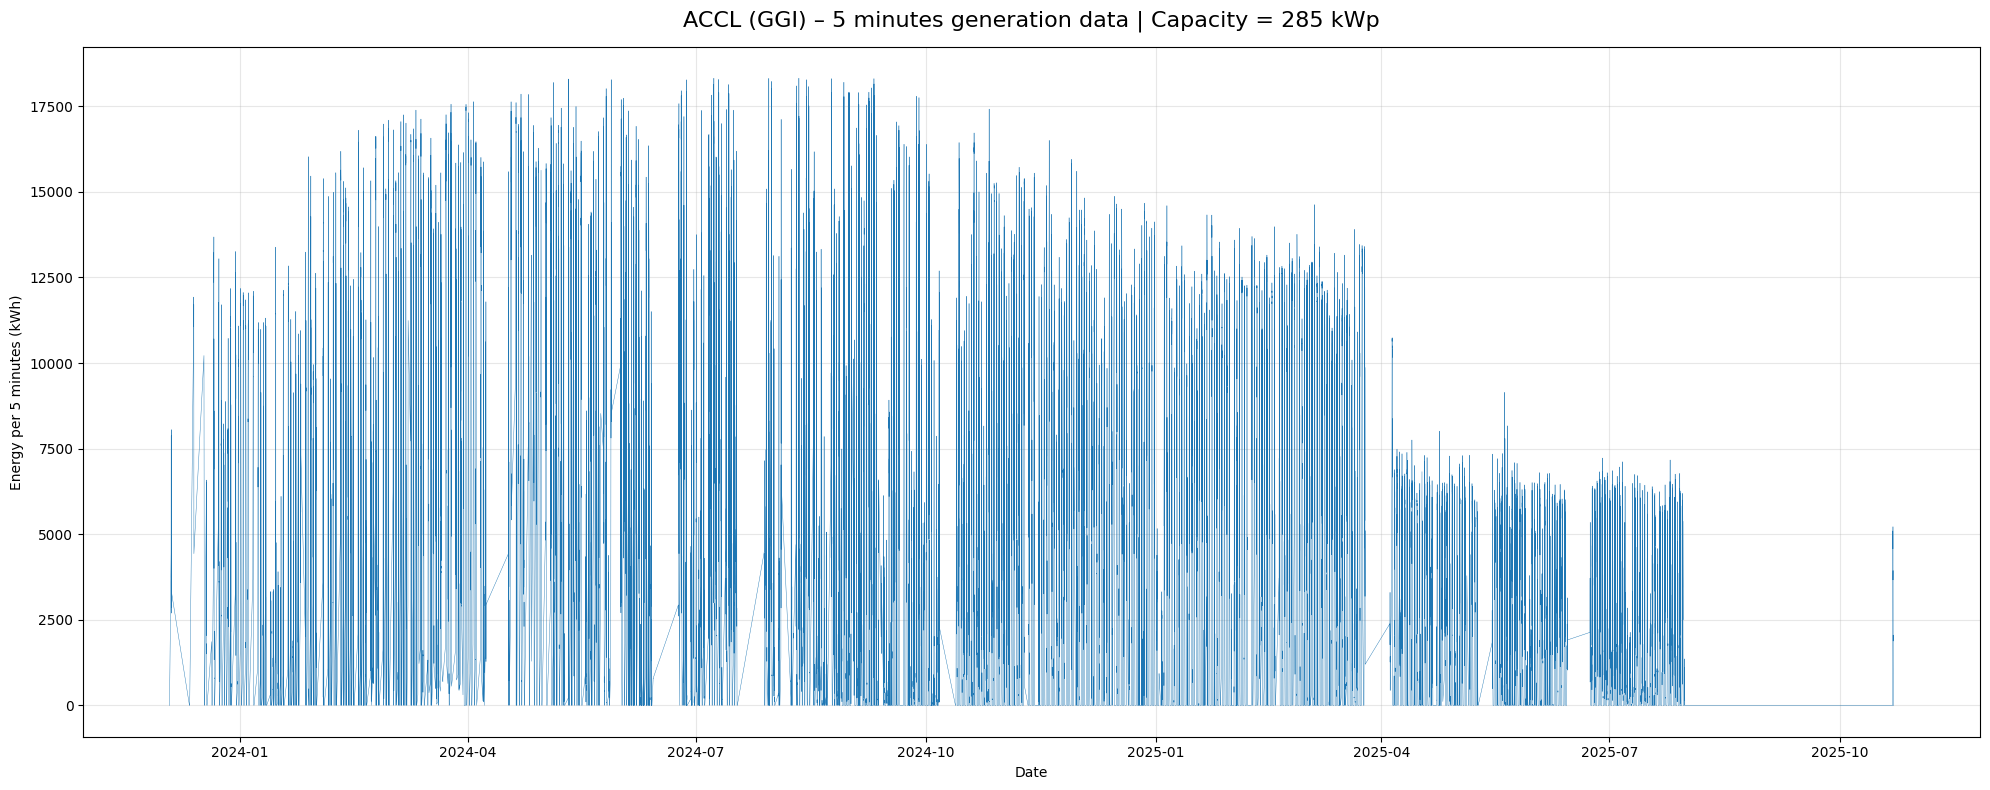


PLANT: ACML (GGI)
Period             : 2024-02-13  →  2025-10-22  (618 days)
Installed capacity : 525.36 kWp
Peak power recorded: 350.15 kW  →  66.6% of installed capacity
Expected 5-min points : 177,984
Available points      : 118,685  →  66.7% completeness
Missing points        : 59,299
Time with production  : 67,908 points  →  38.2% of theoretical time


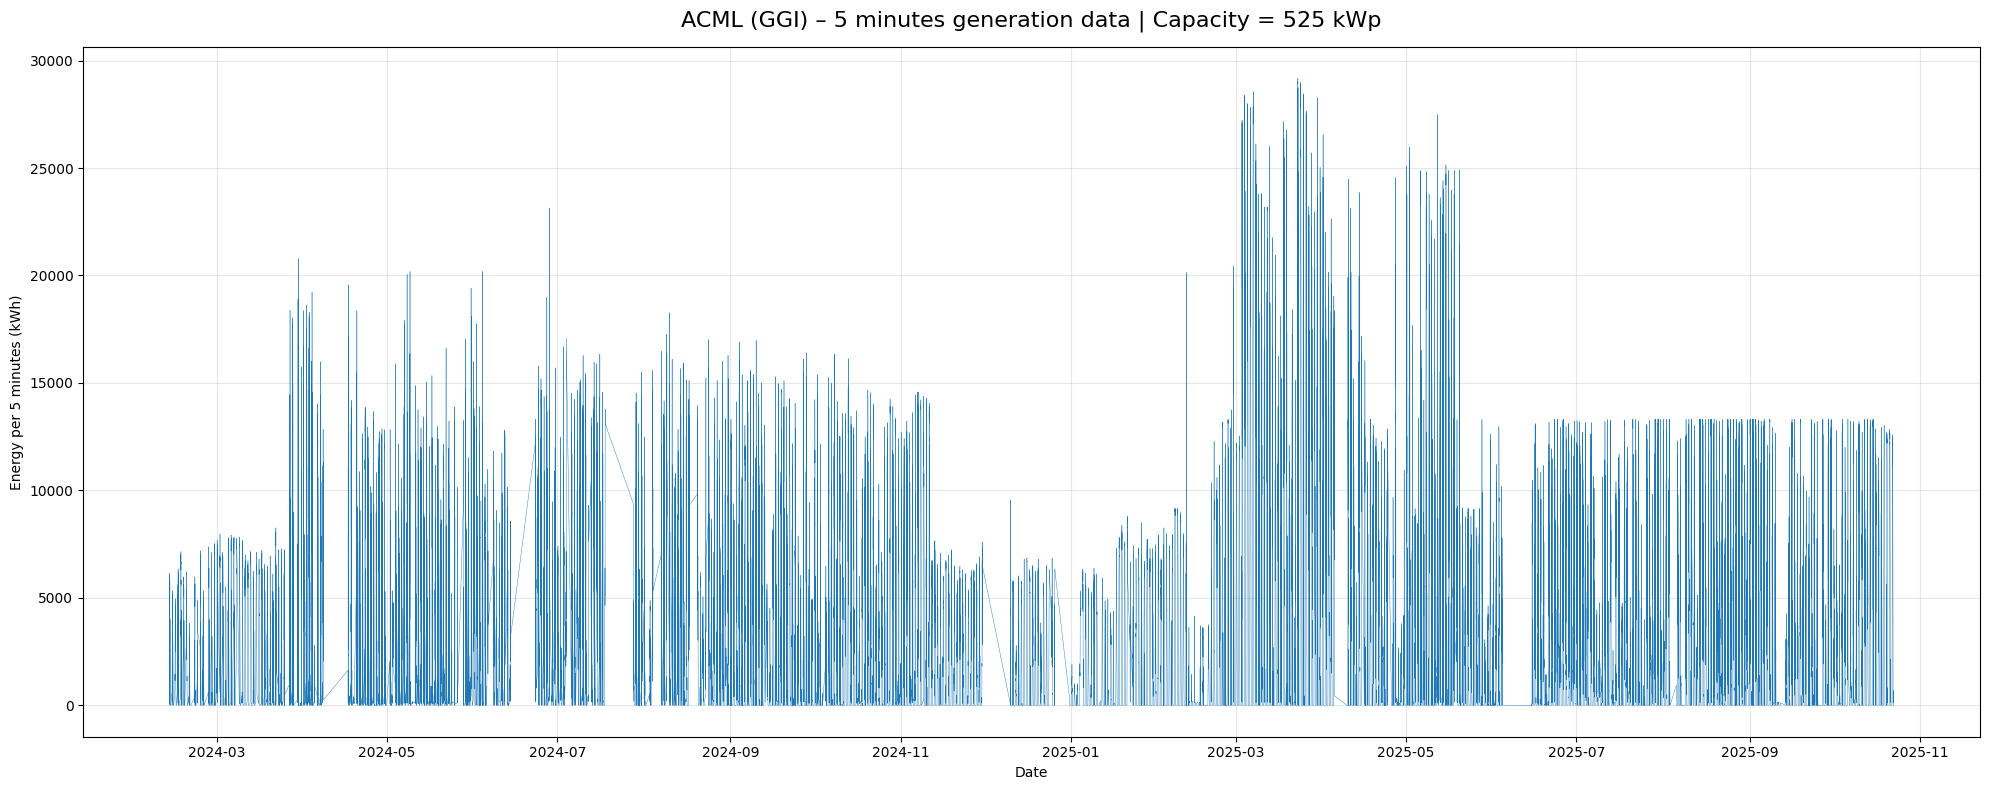


PLANT: CAL (GGI)
Period             : 2023-12-01  →  2025-10-22  (692 days)
Installed capacity : 522.72 kWp
Peak power recorded: 375.99 kW  →  71.9% of installed capacity
Expected 5-min points : 199,296
Available points      : 162,175  →  81.4% completeness
Missing points        : 37,121
Time with production  : 78,382 points  →  39.3% of theoretical time


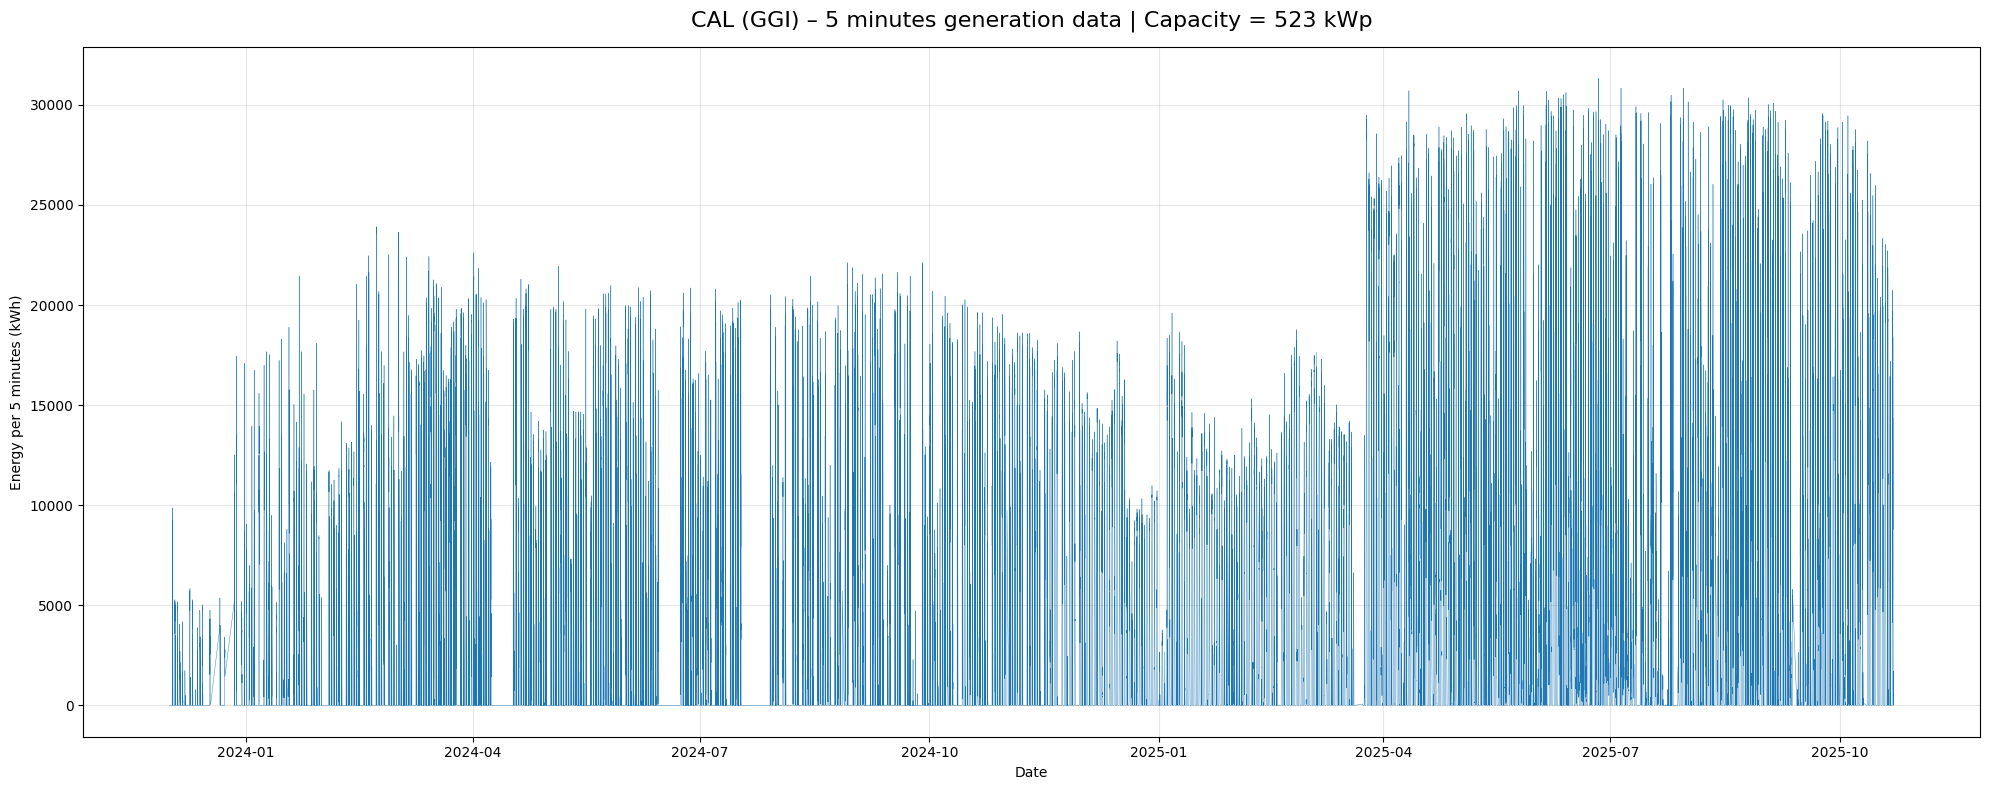


PLANT: HKL (GGI)
Period             : 2023-12-17  →  2025-10-22  (676 days)
Installed capacity : 269.28 kWp
Peak power recorded: 219.75 kW  →  81.6% of installed capacity
Expected 5-min points : 194,688
Available points      : 157,090  →  80.7% completeness
Missing points        : 37,598
Time with production  : 85,614 points  →  44.0% of theoretical time


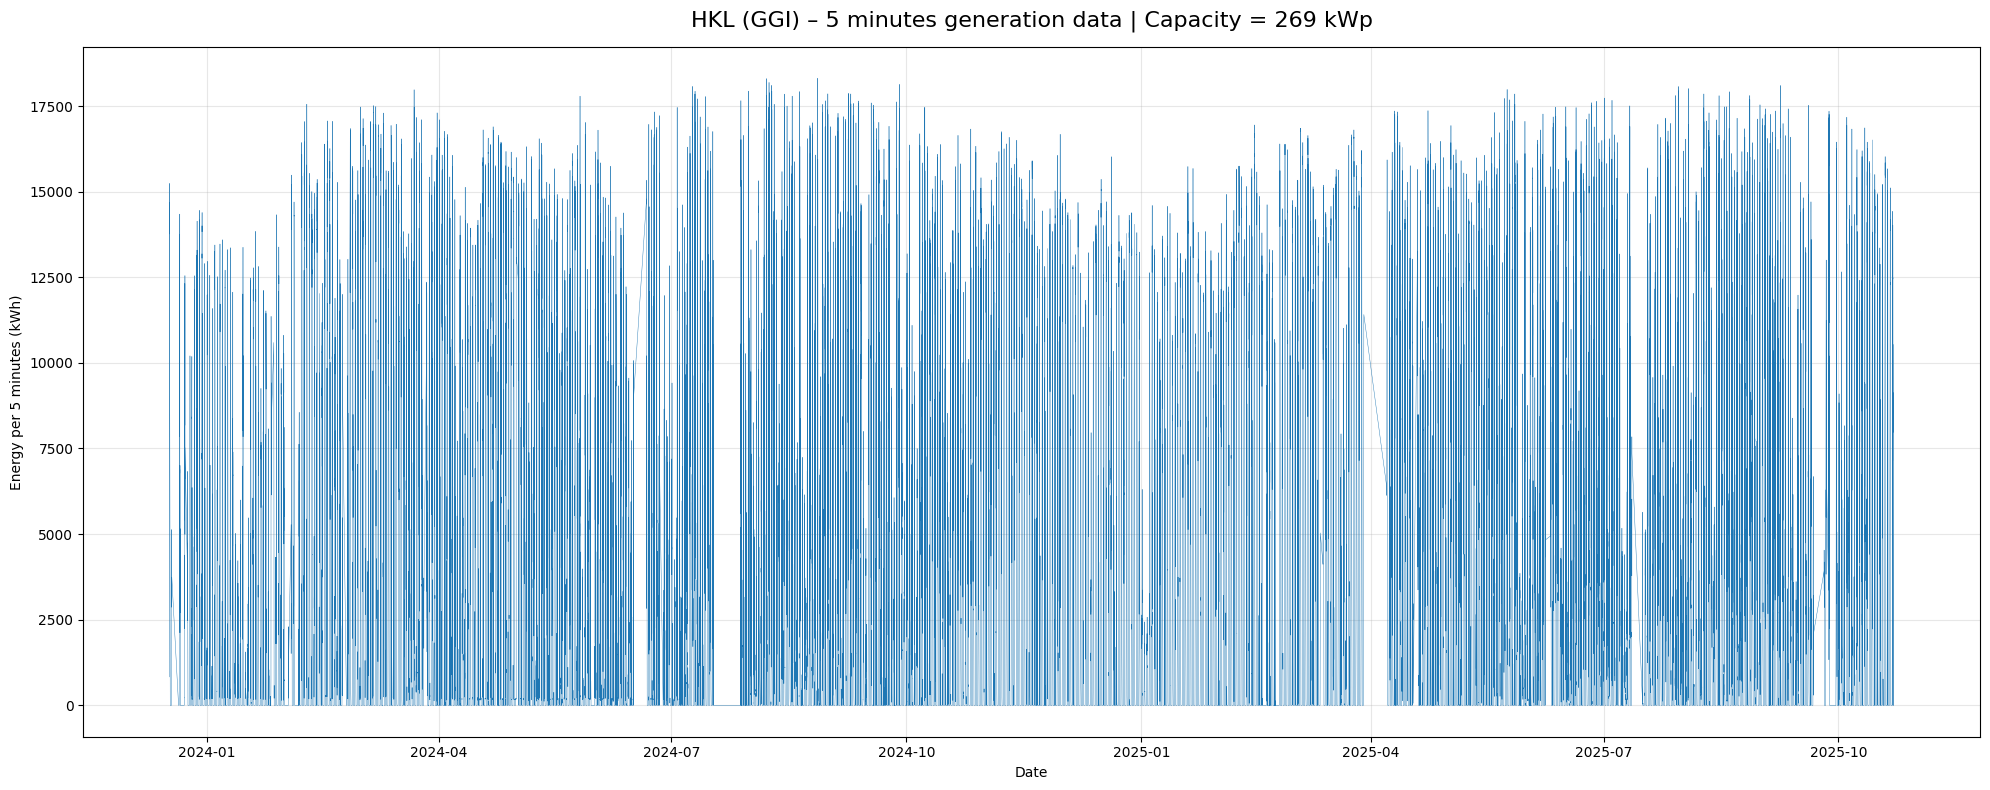


PLANT: NAL (GGI)
Period             : 2023-12-02  →  2025-10-22  (691 days)
Installed capacity : 227.04 kWp
Peak power recorded: 8,210.55 kW  →  3616.3% of installed capacity
Expected 5-min points : 199,008
Available points      : 131,320  →  66.0% completeness
Missing points        : 67,688
Time with production  : 85,244 points  →  42.8% of theoretical time


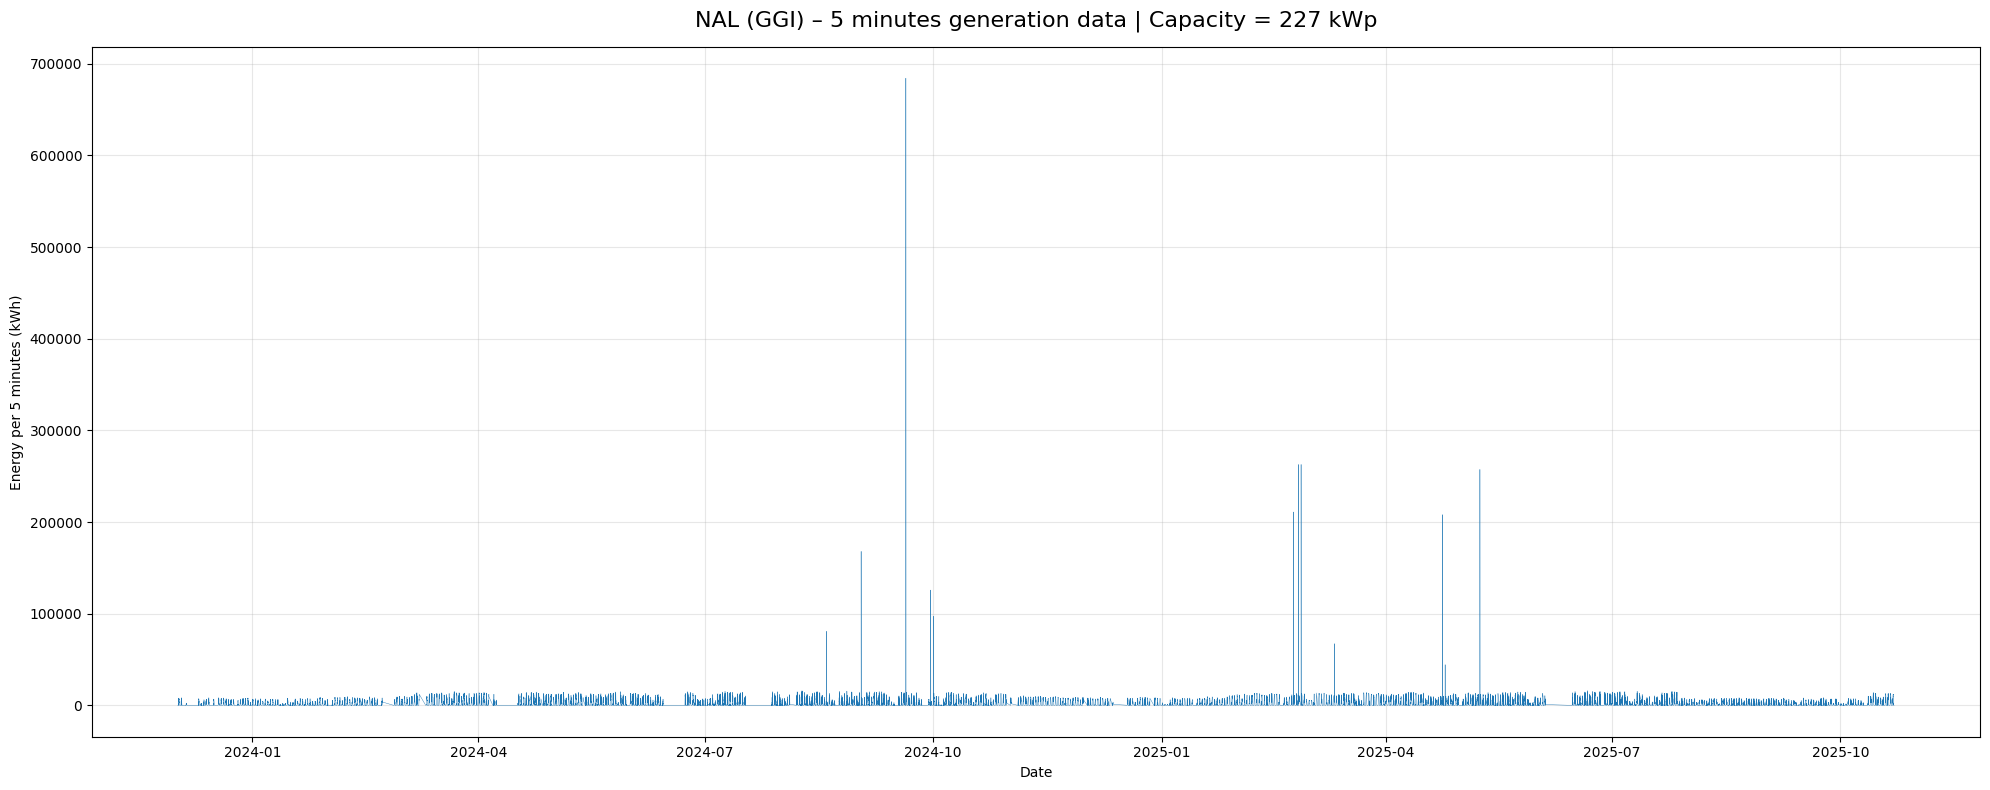


PLANT: KCL (SOLshare)
Period             : 2023-12-02  →  2024-09-21  (295 days)
Installed capacity : 249.20 kWp
Peak power recorded: 1,963.91 kW  →  788.1% of installed capacity
Expected 5-min points : 84,960
Available points      : 55,356  →  65.2% completeness
Missing points        : 29,604
Time with production  : 43,976 points  →  51.8% of theoretical time


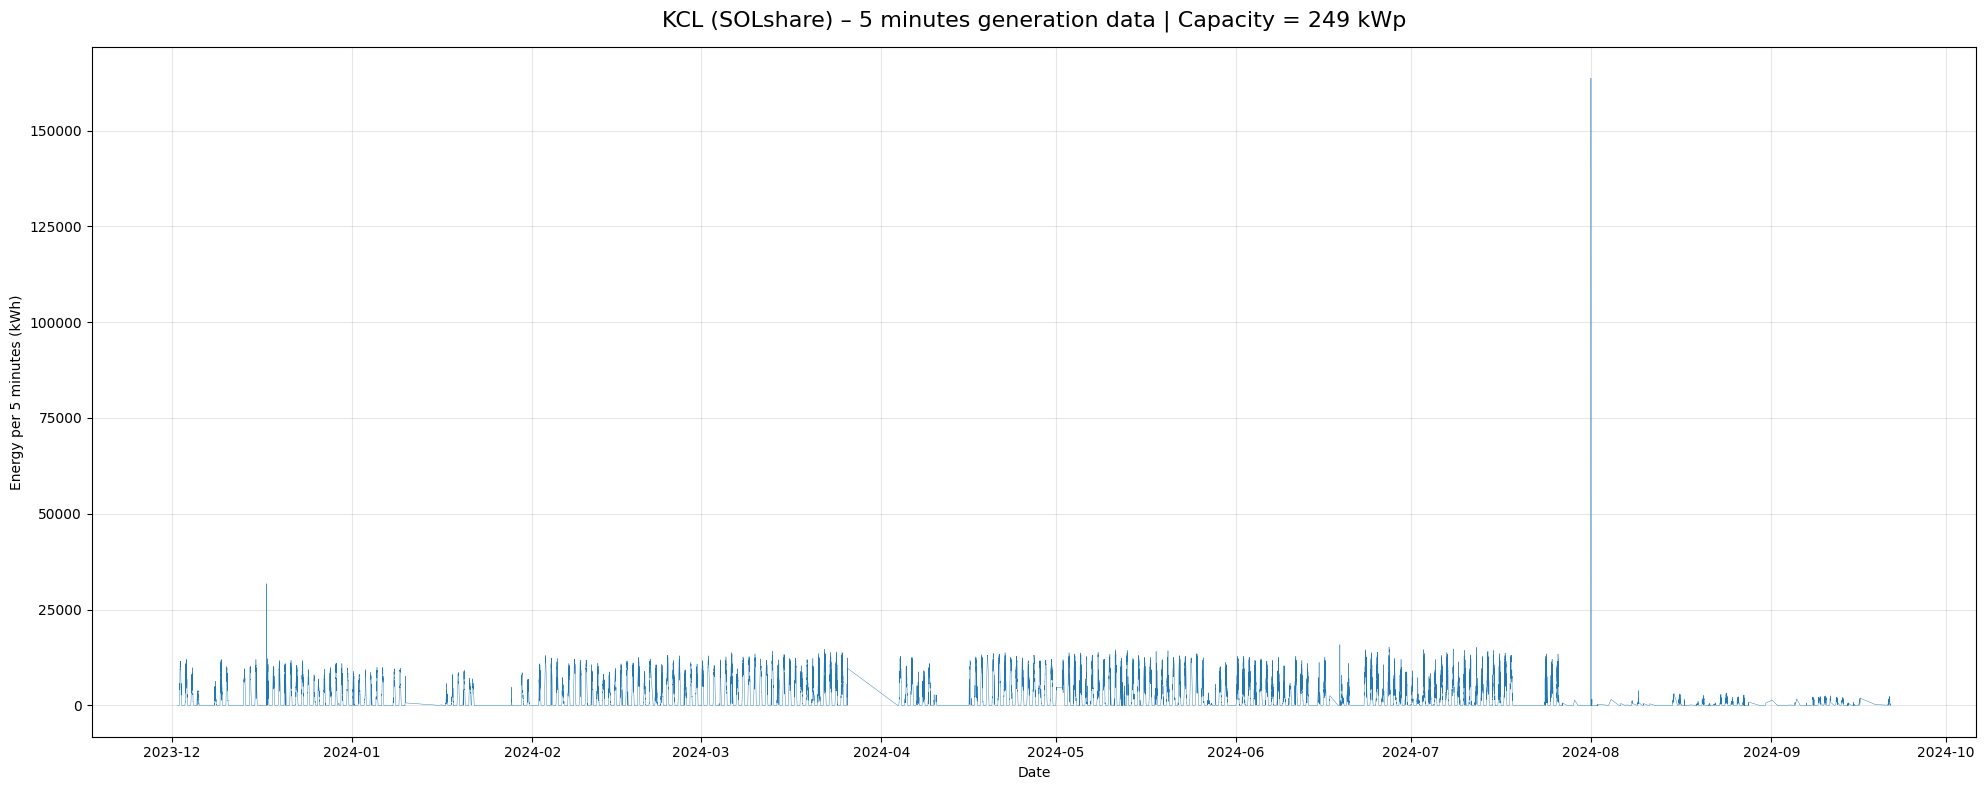


PLANT: Unilever Sales Depot Bogura
Period             : 2023-01-28  →  2024-08-01  (552 days)
Installed capacity : 39.60 kWp
Peak power recorded: 0.33 kW  →  0.8% of installed capacity
Expected 5-min points : 158,976
Available points      : 3,754  →  2.4% completeness
Missing points        : 155,222
Time with production  : 1,438 points  →  0.9% of theoretical time


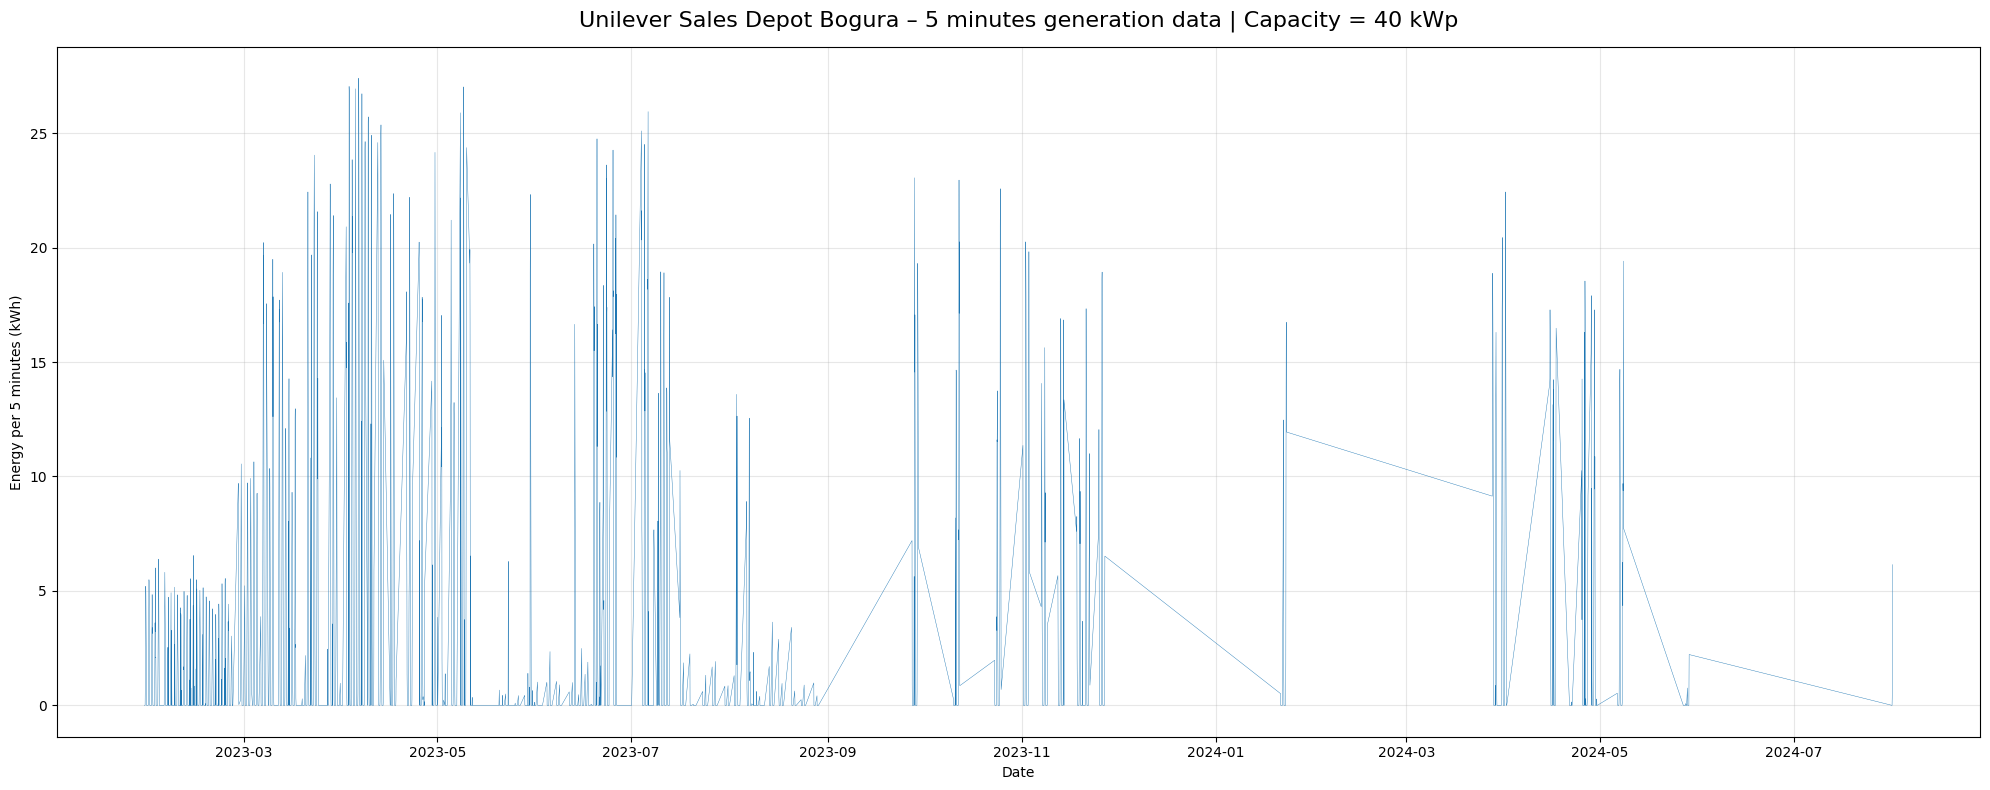


PLANT: Faruk Auto Garage Rajshahi
Period             : 2023-01-23  →  2024-05-10  (474 days)
Installed capacity : 18.53 kWp
Peak power recorded: 0.83 kW  →  4.5% of installed capacity
Expected 5-min points : 136,512
Available points      : 10,725  →  7.9% completeness
Missing points        : 125,787
Time with production  : 10,487 points  →  7.7% of theoretical time


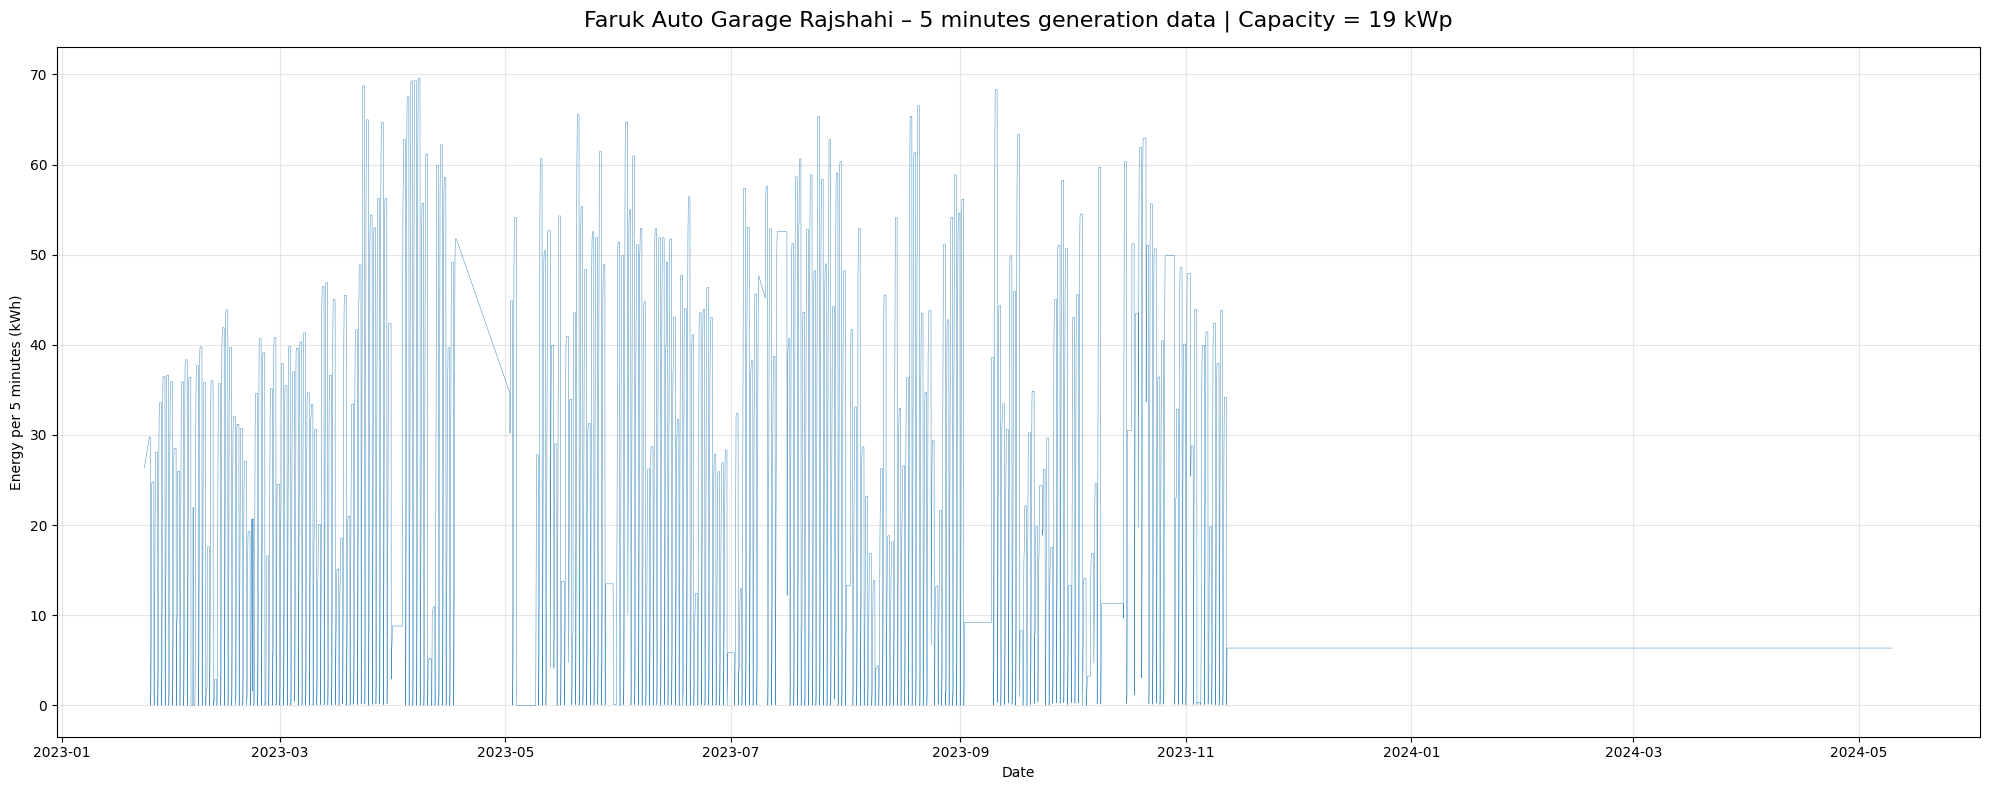


PLANT: Unknown Plant
Period             : 2023-03-29  →  2024-03-25  (363 days)
Installed capacity : UNKNOWN or 0
Peak power recorded: 102.29 kW  →  ratio not available
Expected 5-min points : 104,544
Available points      : 92,345  →  88.3% completeness
Missing points        : 12,199
Time with production  : 74,645 points  →  71.4% of theoretical time


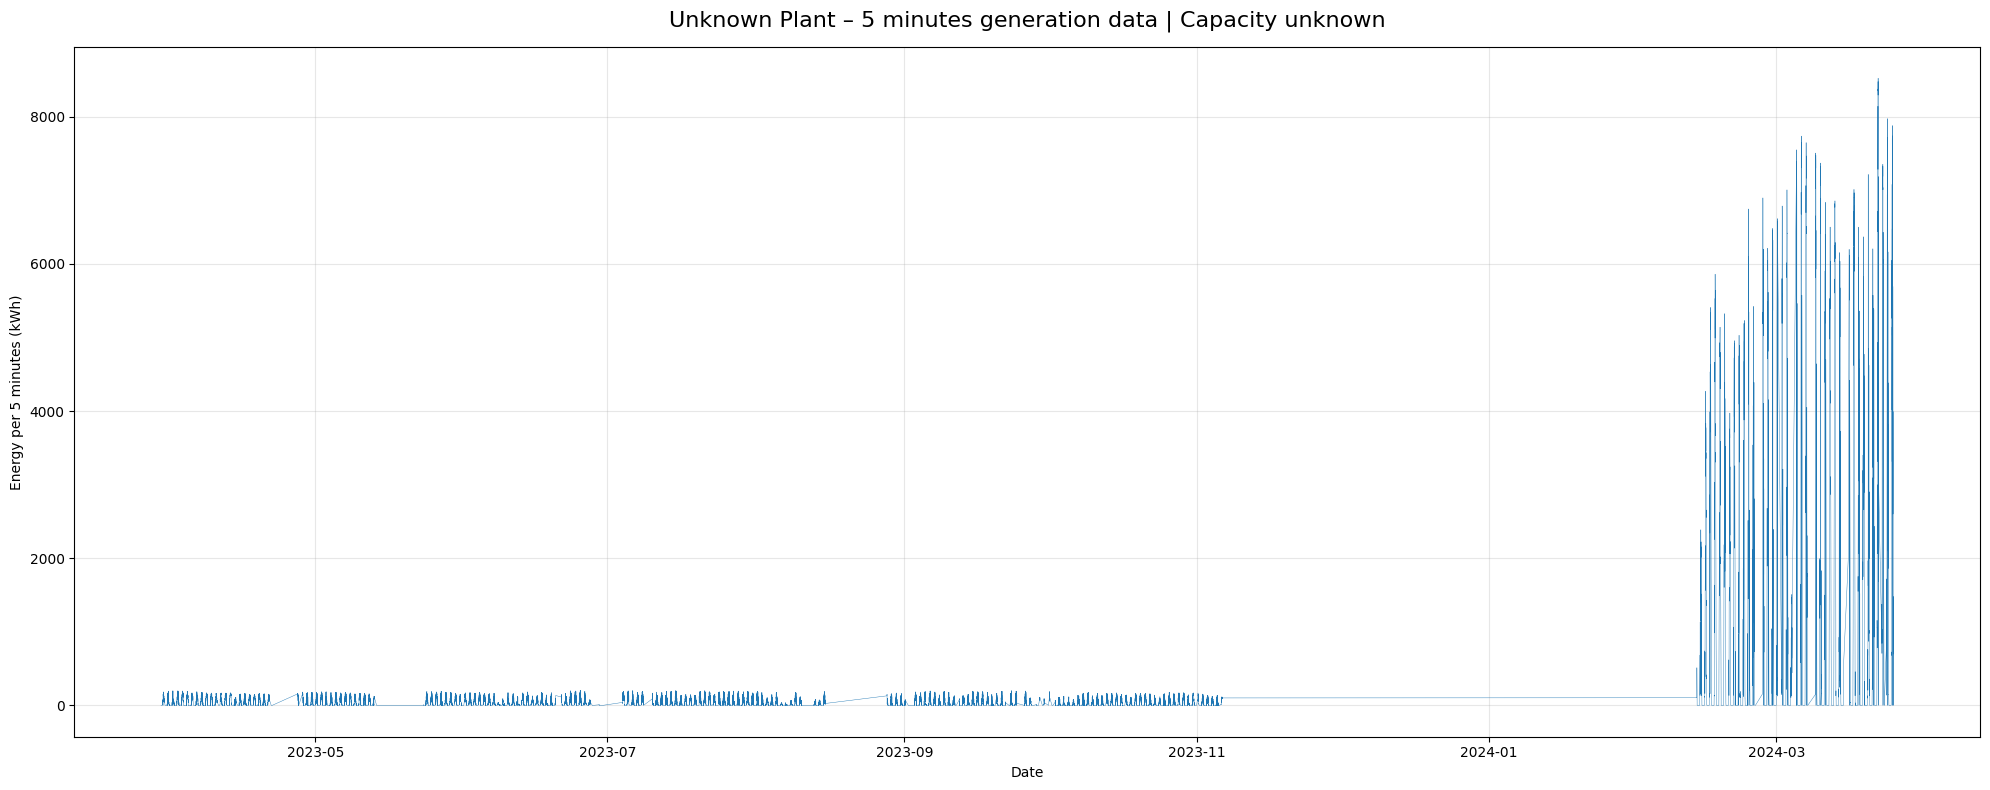


PLANT: DGL (GGI)
Period             : 2025-06-30  →  2025-10-22  (115 days)
Installed capacity : 1,280.40 kWp
Peak power recorded: 920.42 kW  →  71.9% of installed capacity
Expected 5-min points : 33,120
Available points      : 17,216  →  52.0% completeness
Missing points        : 15,904
Time with production  : 10,495 points  →  31.7% of theoretical time


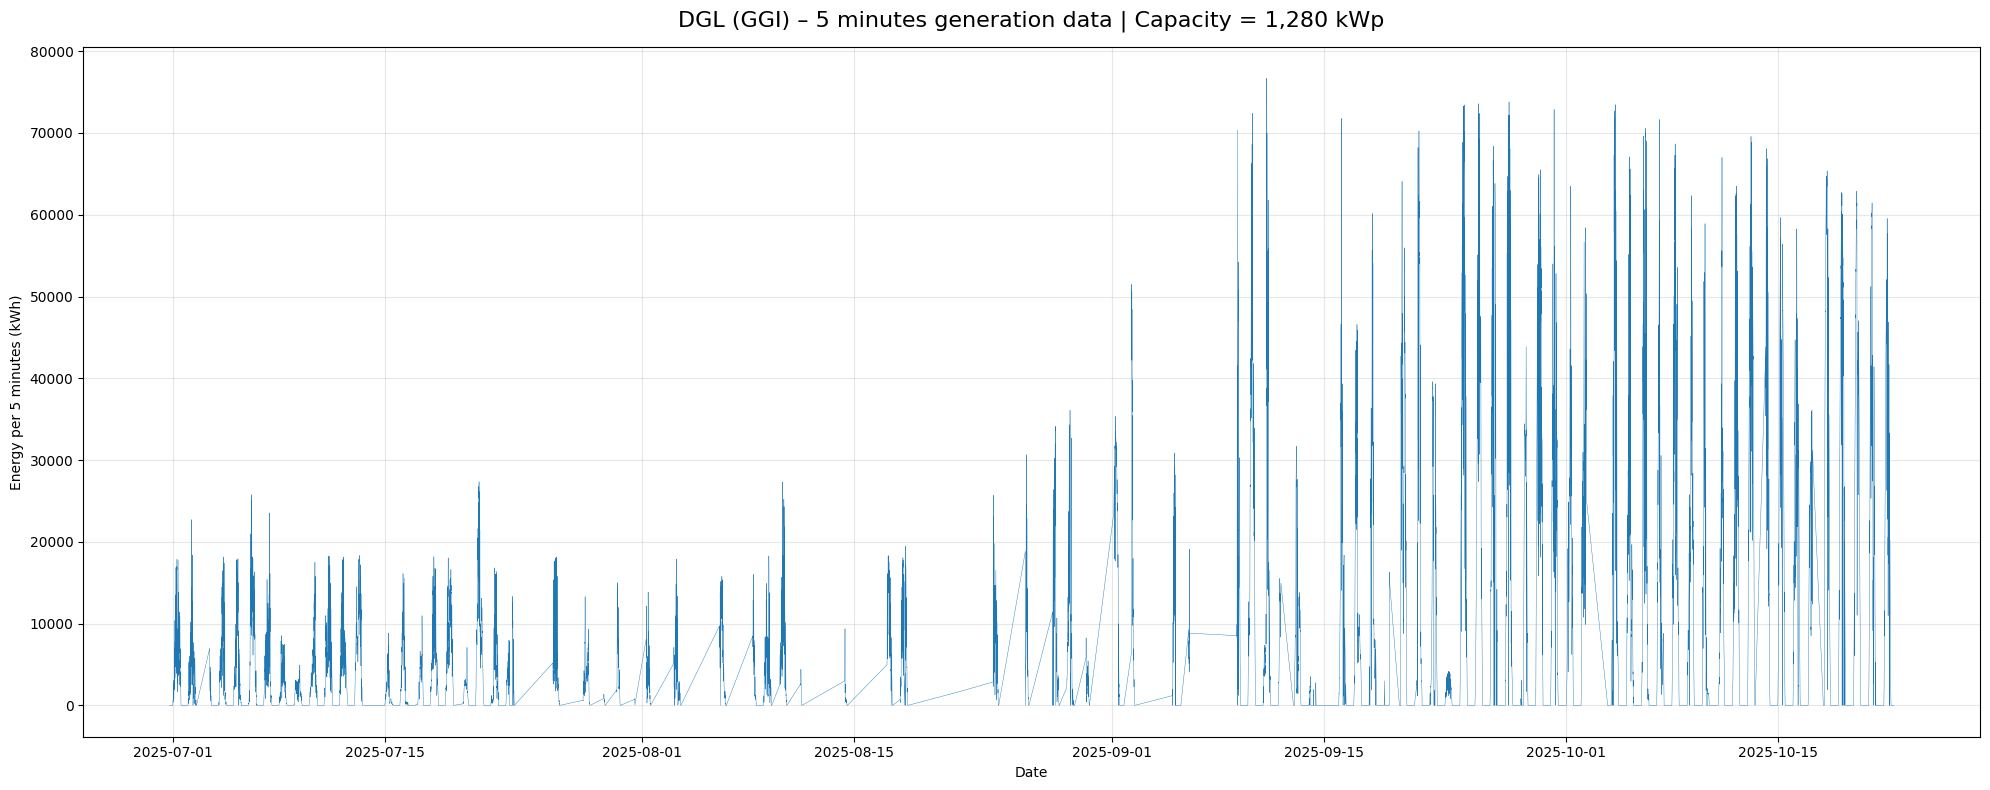

In [4]:
# Plot ALL PLANT

for plant in plant_list:
    # Filter data for current plant
    df_temp = df_5m[df_5m['plant_name'] == plant].copy()

    # Skip if no data for this plant
    if df_temp.empty:
        print(f"\n{'='*60}")
        print(f"PLANT: {plant} → NO DATA FOUND")
        print(f"{'='*60}\n")
        continue

    df_temp = df_temp.sort_values('generation_date').reset_index(drop=True)

    # Date range
    start_date = df_temp['date'].min()
    end_date   = df_temp['date'].max()
    total_days = (end_date - start_date).days + 1

    # Plant capacity
    capacity_kw = df_temp['plant_capacity'].iloc[0]

    # Max instantaneous power: 5-min energy × 12 → kW
    max_5min_wh = df_temp['generation_amount'].max()
    max_power_kw = round(max_5min_wh * 12 / 1000, 2)

    # Expected number of 5-min data points over the period
    expected_points = total_days * 24 * 12
    available_points = len(df_temp)
    completeness = available_points / expected_points

    # Non-zero production points
    producing_points = df_temp[df_temp['generation_amount_kwh'] > 0]
    producing_ratio = len(producing_points) / expected_points

    print(f"\n{'='*70}")
    print(f"PLANT: {plant}")
    print(f"Period             : {start_date}  →  {end_date}  ({total_days} days)")

    if pd.notna(capacity_kw) and capacity_kw > 0:
        peak_ratio = round(max_power_kw / capacity_kw * 100, 1)
        print(f"Installed capacity : {capacity_kw:,.2f} kWp")
        print(f"Peak power recorded: {max_power_kw:,.2f} kW  →  {peak_ratio}% of installed capacity")
    else:
        print(f"Installed capacity : UNKNOWN or 0")
        print(f"Peak power recorded: {max_power_kw:,.2f} kW  →  ratio not available")

    print(f"Expected 5-min points : {expected_points:,}")
    print(f"Available points      : {available_points:,}  →  {completeness:.1%} completeness")
    print(f"Missing points        : {expected_points - available_points:,}")
    print(f"Time with production  : {len(producing_points):,} points  →  {producing_ratio:.1%} of theoretical time")

    # ------------------------------------------------------------------
    # Plot
    # ------------------------------------------------------------------
    plt.figure(figsize=(20, 8))
    plt.plot(df_temp['generation_date'], df_temp['generation_amount'], linewidth=0.3)

    title_capacity = f" | Capacity = {capacity_kw:,.0f} kWp" if (pd.notna(capacity_kw) and capacity_kw > 0) else " | Capacity unknown"
    plt.title(f"{plant} – 5 minutes generation data{title_capacity}",
              fontsize=16, pad=15)
    plt.xlabel("Date")
    plt.ylabel("Energy per 5 minutes (kWh)")
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


In [5]:
df_HKL_5m['generation_date'] = df_HKL_5m['generation_date'].dt.tz_convert('Asia/Dhaka')

## Later in our analysis we found some error in the 2023 data, so we will keep only 24/25 data
df_HKL_5m = df_HKL_5m[df_HKL_5m['generation_date'] > pd.Timestamp('2023-12-31 23:59:59+06:00')].copy()
old_df = df_HKL_5m.copy()

# 1. Deduplicates on generation_date
#     We keep the last record for each timestamp (or you can use .mean(), .sum(), etc.)
df_HKL_5m = (df_HKL_5m
            .sort_values('generation_date')                    # safety
            .drop_duplicates(subset='generation_date', keep='last')  # <-- KEY LINE
           ).copy()

print(f"After deduplication: {len(df_HKL_5m):,} → removed {len(old_df) - len(df_HKL_5m):,} duplicates")


After deduplication: 153,567 → removed 816 duplicates


In [6]:
# MISING DATA
start_date = df_HKL_5m['generation_date'].min()
end_date   = df_HKL_5m['generation_date'].max()


full_index = pd.date_range(
    start=start_date,
    end=end_date,
    freq='5min',
    tz='Asia/Dhaka'
)

df_reindexed = df_HKL_5m.set_index('generation_date').reindex(full_index).reset_index()
df_reindexed = df_reindexed.rename(columns={'index': 'generation_date'})

print(f"After reindexing → {len(df_reindexed):,} rows (including gaps)")

expected = len(full_index)
available = len(df_HKL_5m)
missing = expected - available

print(f"Expected : {expected:,}")
print(f"Available: {available:,} → {available/expected:.1%}")
print(f"Missing  : {missing:,} → {missing/expected:.1%}")
print("\n")
print(df_reindexed.info())

After reindexing → 190,342 rows (including gaps)
Expected : 190,342
Available: 153,567 → 80.7%
Missing  : 36,775 → 19.3%


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190342 entries, 0 to 190341
Data columns (total 5 columns):
 #   Column                 Non-Null Count   Dtype                     
---  ------                 --------------   -----                     
 0   generation_date        190342 non-null  datetime64[ns, Asia/Dhaka]
 1   date                   153567 non-null  object                    
 2   plant_name             153567 non-null  object                    
 3   plant_capacity         153567 non-null  float64                   
 4   generation_amount_kwh  153567 non-null  float64                   
dtypes: datetime64[ns, Asia/Dhaka](1), float64(2), object(2)
memory usage: 7.3+ MB
None


In [7]:
import pvlib
from pvlib.location import Location

location = Location(
    latitude = HKL_gps[0],
    longitude = HKL_gps[1],
    tz='Asia/Dhaka')

times = pd.DatetimeIndex(df_reindexed['generation_date'])

# Solar Position
solpos = location.get_solarposition(times)
clearsky = location.get_clearsky(times)

df = df_reindexed.merge(solpos, on='generation_date', how='left')
df = df.merge(clearsky, on='generation_date', how='left')

#df['is_daytime'] = df_temp['elevation'] > 0
# TODO > need to consider last hour as daytime (if elevation is -3 we might still have a bit of production) sunset in between 2 indexs


# Extended static data
df['plant_capacity'] = df['plant_capacity'][0]
df['plant_name'] = df['plant_name'][0]

# DROP useless columns
df.drop(columns=['date', 'apparent_zenith', 'zenith', 'apparent_elevation', 'azimuth', 'equation_of_time', 'dhi', 'dni'], inplace=True)

# Reorganize column
df = df[['generation_date', 'plant_name', 'plant_capacity', 'generation_amount_kwh', 'elevation', 'ghi']]


df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 190342 entries, 0 to 190341
Data columns (total 6 columns):
 #   Column                 Non-Null Count   Dtype                     
---  ------                 --------------   -----                     
 0   generation_date        190342 non-null  datetime64[ns, Asia/Dhaka]
 1   plant_name             190342 non-null  object                    
 2   plant_capacity         190342 non-null  float64                   
 3   generation_amount_kwh  153567 non-null  float64                   
 4   elevation              190342 non-null  float64                   
 5   ghi                    190342 non-null  float64                   
dtypes: datetime64[ns, Asia/Dhaka](1), float64(4), object(1)
memory usage: 14.2+ MB


In [8]:
def smart_fill_energy(df):
    df = df.copy()

    # Energy per 5-min (Wh → kWh later if you want)
    energy = df['generation_amount_kwh'].copy()

    # Rule-based filling
    # a) Night (elevation < 0°) → force 0
    # Problem at the en of the day elevation could be negative but energy was previously produce.
    # exemple : sunset at 18:59, solar panel produce energy from 18:55 to 18:59
    night_mask = df['elevation'] < 0
    energy[night_mask] = 0

    # b) Very short gaps (< 2 hours) → linear interpolation
    energy = energy.interpolate(method='linear', limit=24)  # max 2 hours

    # c) Medium gaps (2h – 7 days) → use clear-sky expectation
    #    (this is the GOLD for ML training!)
    # medium_gaps = energy.isna() & (df['elevation'] > 10) & (df['ghi_clearsky'] > 50)
    # energy[medium_gaps] = (df['ghi_clearsky'][medium_gaps] / 1000) * 269.28 * 0.82 * (5/60)  # 5-min expected

    # ['ghi_clearsky'] doesnt exist, replacing by ghi ? (is it the same ??)
    medium_gaps = energy.isna() & (df['elevation'] > 10) & (df['ghi'] > 50)
    energy[medium_gaps] = (df['ghi'][medium_gaps] / 1000) * 269.28 * 0.82 * (5/60)  # 5-min expected

    # d) Long gaps (> 7 days) → leave as NaN or flag
    #    (your ML model must learn to ignore or flag them)
    long_gaps = energy.isna()
    df['long_gap'] = long_gaps.astype(int)

    df['filled_energy'] = energy
    return df

df = smart_fill_energy(df)

In [9]:
df['generation_amount_kwh'].mean(), df['filled_energy'].mean()

df['generation_amount_kwh'].fillna(0)

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
190337    0.0
190338    0.0
190339    0.0
190340    0.0
190341    0.0
Name: generation_amount_kwh, Length: 190342, dtype: float64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 190342 entries, 0 to 190341
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype                     
---  ------                 --------------   -----                     
 0   generation_date        190342 non-null  datetime64[ns, Asia/Dhaka]
 1   plant_name             190342 non-null  object                    
 2   plant_capacity         190342 non-null  float64                   
 3   generation_amount_kwh  153567 non-null  float64                   
 4   elevation              190342 non-null  float64                   
 5   ghi                    190342 non-null  float64                   
 6   long_gap               190342 non-null  int64                     
 7   filled_energy          189817 non-null  float64                   
dtypes: datetime64[ns, Asia/Dhaka](1), float64(5), int64(1), object(1)
memory usage: 17.1+ MB


In [11]:
df_HKL_5m = df.copy()

# # Resample for hourly data (to match meteo data freq)
df_HKL_h = (
    df_HKL_5m
    .set_index('generation_date')
    .resample('1H')
    .agg({
        'generation_amount_kwh': 'sum',
        'filled_energy':'sum',
        'ghi':'mean',
        'elevation':'mean',
        'long_gap':'first',
        'plant_capacity': 'first',
        'plant_name': 'first',

    })
    .reset_index()
)

df_HKL_h['generation_date'] = df_HKL_h['generation_date'].dt.tz_convert('Asia/Dhaka')

In [12]:
df_HKL_h

,generation_date,generation_amount_kwh,filled_energy,ghi,elevation,long_gap,plant_capacity,plant_name
0,2024-01-01 00:00:00+06:00,0.000000,0.000000,0.000000,-83.415773,0,269.28,HKL (GGI)
1,2024-01-01 01:00:00+06:00,0.000000,0.000000,0.000000,-70.358403,0,269.28,HKL (GGI)
2,2024-01-01 02:00:00+06:00,0.000000,0.000000,0.000000,-56.698740,0,269.28,HKL (GGI)
3,2024-01-01 03:00:00+06:00,0.000000,0.000000,0.000000,-43.136126,0,269.28,HKL (GGI)
4,2024-01-01 04:00:00+06:00,0.000000,0.000000,0.000000,-29.735164,0,269.28,HKL (GGI)
...,...,...,...,...,...,...,...,...
15857,2025-10-22 17:00:00+06:00,1.872542,1.797308,3.570067,-1.031215,0,269.28,HKL (GGI)
15858,2025-10-22 18:00:00+06:00,0.000000,0.000000,0.000000,-14.561566,0,269.28,HKL (GGI)
15859,2025-10-22 19:00:00+06:00,0.000000,0.000000,0.000000,-28.236794,0,269.28,HKL (GGI)
15860,2025-10-22 20:00:00+06:00,0.000000,0.000000,0.000000,-41.908827,0,269.28,HKL (GGI)


In [13]:
df_HKL_h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15862 entries, 0 to 15861
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype                     
---  ------                 --------------  -----                     
 0   generation_date        15862 non-null  datetime64[ns, Asia/Dhaka]
 1   generation_amount_kwh  15862 non-null  float64                   
 2   filled_energy          15862 non-null  float64                   
 3   ghi                    15862 non-null  float64                   
 4   elevation              15862 non-null  float64                   
 5   long_gap               15862 non-null  int64                     
 6   plant_capacity         15862 non-null  float64                   
 7   plant_name             15862 non-null  object                    
dtypes: datetime64[ns, Asia/Dhaka](1), float64(5), int64(1), object(1)
memory usage: 991.5+ KB


In [14]:
# Retreive Historical weather Data. (data was bought from https://openweathermap.org/)
weather = pd.read_csv('open_data/gazipur_weather.csv')

weather = weather[['dt_iso',
                   'temp',
                   'visibility',
                   'rain_1h',
                   'clouds_all']]

weather['generation_date'] = pd.to_datetime(weather['dt_iso'].str.replace(' UTC', ''), utc=True)
weather['generation_date'] = weather['generation_date'].dt.tz_convert('Asia/Dhaka')
weather = weather.drop(columns='dt_iso')

# UNKNOWN ERROR in weather data (duplicate)
weather = weather.groupby('generation_date').agg({
    'temp': 'mean',
    'visibility': 'mean',
    'rain_1h': 'sum',  # Sum rain over duplicates
    'clouds_all': 'mean'
}).reset_index()


# TODO > RETREIVE DAILY METEO DATA

df = df_HKL_h.merge(weather, on='generation_date', how='left')

df['visibility'] = df['visibility'].interpolate(method='linear')
df['is_daytime'] = df['ghi'] > 0

df['plant_capacity'].fillna(df['plant_capacity'].iloc[0], inplace=True)
df['plant_name'].fillna('HKL (GCI)', inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15862 entries, 0 to 15861
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype                     
---  ------                 --------------  -----                     
 0   generation_date        15862 non-null  datetime64[ns, Asia/Dhaka]
 1   generation_amount_kwh  15862 non-null  float64                   
 2   filled_energy          15862 non-null  float64                   
 3   ghi                    15862 non-null  float64                   
 4   elevation              15862 non-null  float64                   
 5   long_gap               15862 non-null  int64                     
 6   plant_capacity         15862 non-null  float64                   
 7   plant_name             15862 non-null  object                    
 8   temp                   15862 non-null  float64                   
 9   visibility             15862 non-null  float64                   
 10  rain_1h                15862 non-n

In [15]:
PR_typique = 0.82  # Typical performance ratio

df['expected_power_kw'] = float('nan')

df['expected_power_kw'] = (df['ghi'] / 1000) * df['plant_capacity'] * 0.82


In [16]:
df.tail(3)

,generation_date,generation_amount_kwh,filled_energy,ghi,elevation,long_gap,plant_capacity,plant_name,temp,visibility,rain_1h,clouds_all,is_daytime,expected_power_kw
15859,2025-10-22 19:00:00+06:00,0.0,0.0,0.0,-28.236794,0,269.28,HKL (GGI),28.53,4000.0,0.0,40.0,False,0.0
15860,2025-10-22 20:00:00+06:00,0.0,0.0,0.0,-41.908827,0,269.28,HKL (GGI),26.62,4000.0,0.0,0.0,False,0.0
15861,2025-10-22 21:00:00+06:00,0.0,0.0,0.0,-54.798018,0,269.28,HKL (GGI),26.62,4000.0,0.0,0.0,False,0.0


In [17]:
df['expected_power_kw'].mean(), df['generation_amount_kwh'].mean()

(56.63434933096814, 29.84233333447533)

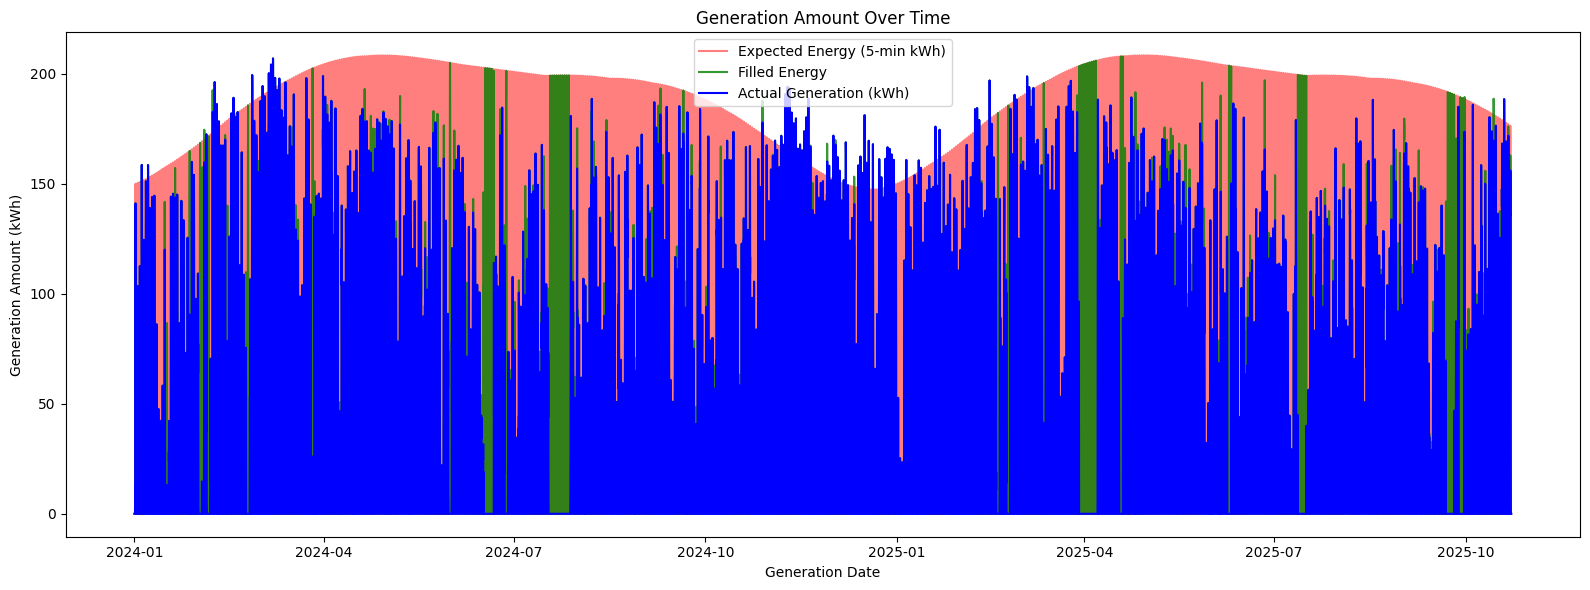

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))
sns.lineplot(data=df, x='generation_date', y='expected_power_kw', label='Expected Energy (5-min kWh)', color='red', alpha=0.5)
sns.lineplot(data=df, x='generation_date', y='filled_energy', label='Filled Energy', color='green', alpha=0.8)
sns.lineplot(data=df, x='generation_date', y='generation_amount_kwh', label='Actual Generation (kWh)', color='blue')
plt.xlabel('Generation Date')
plt.ylabel('Generation Amount (kWh)')
plt.title('Generation Amount Over Time')
plt.legend()
plt.tight_layout()
plt.show()

In [19]:
###########################################################################################################

In [20]:
df['hour'] = df['generation_date'].dt.hour
df['dayofyear'] = df['generation_date'].dt.dayofyear
df['month'] = df['generation_date'].dt.month

# Clear-sky expected energy (5-min)
df['expected_energy_5min_kwh'] = (df['ghi'] / 1000) * 269.28 * 0.82 * (5/60)

# Instantaneous power
df['actual_power_kw']   = df['generation_amount_kwh'] * 12
df['expected_power_kw'] = df['ghi'] / 1000 * 269.28 * 0.82

# Performance Ratio (PR) instantaneous
df['PR_inst'] = df['actual_power_kw'] / df['expected_power_kw'].replace(0, np.nan)

# Temperature-corrected expected (optional but powerful)
df['temp_effect'] = 1 + 0.004 * (25 - df['temp'])  # ≈ -0.4%/°C
df['expected_power_temp_corr_kw'] = df['expected_power_kw'] * df['temp_effect']

# Cloud impact (this is pure gold for ML)
df['cloud_impact'] = df['PR_inst'] / df['temp_effect']  # removes temperature effect

In [21]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import numpy as np

# === 1. Features for anomaly detection ===
features = [
    'hour',
    'dayofyear',
    'ghi',                    # clear-sky irradiance
    'temp',
    'clouds_all',
    'visibility',
    'PR_inst',                # instantaneous Performance Ratio
    'cloud_impact'            # PR corrected for temperature
]

# === 2. Prepare data ===
X = df[features].copy()

# Fill any remaining NaN (should be very few thanks to your smart_fill)
X = X.fillna(method='ffill').fillna(method='bfill').fillna(0)

# === 3. Scale ===
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# === 4. TRAIN the Isolation Forest (this line was missing!) ===
iso = IsolationForest(
    contamination=0.02,      # ~2% of points will be flagged as anomalies
    random_state=42,
    n_jobs=-1
)
iso.fit(X_scaled)            # ←←←← THIS WAS MISSING!

# === 5. Now predict ===
df['anomaly_score'] = iso.decision_function(X_scaled)   # lower = more anomalous
df['is_anomaly']    = iso.predict(X_scaled) == -1        # True = anomaly

print(f"→ Detected {df['is_anomaly'].sum()} anomalous hourly points "
      f"({df['is_anomaly'].mean():.2%} of total)")

# === CORRECTION FINALE : on ne veut des alertes QUE quand le soleil brille vraiment ===
daytime_mask = (df['elevation'] > 15) & (df['ghi'] > 100)   # soleil bien présent
reasonable_PR = df['expected_power_kw'] > 15                 # évite division par quasi-zéro

valid_mask = daytime_mask & reasonable_PR

# On remet à zéro les anomalies la nuit / au lever
df['is_anomaly'] = df['is_anomaly'] & valid_mask
df.loc[~valid_mask, 'anomaly_score'] = 0.5   # score très normal

→ Detected 318 anomalous hourly points (2.00% of total)


In [22]:
# Show the worst anomalies
df[df['is_anomaly']].sort_values('anomaly_score').head(100)[
    ['generation_date', 'actual_power_kw', 'expected_power_kw',
     'PR_inst', 'temp', 'clouds_all', 'anomaly_score']
]

,generation_date,actual_power_kw,expected_power_kw,PR_inst,temp,clouds_all,anomaly_score
394,2024-01-17 10:00:00+06:00,108.978059,137.469358,0.792744,13.25,100.0,-0.020476
8841,2025-01-03 09:00:00+06:00,208.738304,102.836582,2.029806,13.97,100.0,-0.012313
8338,2024-12-13 10:00:00+06:00,1503.918357,134.203665,11.206239,16.50,96.0,-0.011094
8576,2024-12-23 08:00:00+06:00,641.143604,63.666131,10.070403,17.42,100.0,-0.010716
537,2024-01-23 09:00:00+06:00,440.079709,107.651709,4.087996,12.47,100.0,-0.010215
8577,2024-12-23 09:00:00+06:00,1171.689303,103.509166,11.319667,17.64,95.0,-0.009494
80,2024-01-04 08:00:00+06:00,298.520877,61.893950,4.823103,15.91,100.0,-0.005414
322,2024-01-14 10:00:00+06:00,233.498229,136.263249,1.713582,14.43,100.0,-0.005107
321,2024-01-14 09:00:00+06:00,182.114959,104.821840,1.737376,14.49,100.0,-0.004181
8506,2024-12-20 10:00:00+06:00,1329.959471,132.652814,10.025867,18.61,100.0,-0.003795


In [23]:
df[df['is_anomaly']].head(20)

,generation_date,generation_amount_kwh,filled_energy,ghi,elevation,long_gap,plant_capacity,plant_name,temp,visibility,...,dayofyear,month,expected_energy_5min_kwh,actual_power_kw,PR_inst,temp_effect,expected_power_temp_corr_kw,cloud_impact,anomaly_score,is_anomaly
80,2024-01-04 08:00:00+06:00,24.876740,24.876740,280.304618,19.685598,0,269.28,HKL (GGI),15.91,100.0,...,4,1,5.157829,298.520877,4.823103,1.03636,64.144415,4.653887,-0.005414,True
321,2024-01-14 09:00:00+06:00,15.176247,15.176247,474.715953,30.094955,0,269.28,HKL (GGI),14.49,500.0,...,14,1,8.735153,182.114959,1.737376,1.04204,109.228550,1.667284,-0.004181,True
322,2024-01-14 10:00:00+06:00,19.458186,19.458186,617.107447,38.337077,0,269.28,HKL (GGI),14.43,700.0,...,14,1,11.355271,233.498229,1.713582,1.04228,142.024459,1.644071,-0.005107,True
393,2024-01-17 09:00:00+06:00,8.120702,11.303629,478.604072,30.328815,0,269.28,HKL (GGI),12.87,600.0,...,17,1,8.806698,97.448421,0.922105,1.04852,110.807985,0.879435,-0.000078,True
394,2024-01-17 10:00:00+06:00,9.081505,9.081505,622.569664,38.692191,0,269.28,HKL (GGI),13.25,300.0,...,17,1,11.455780,108.978059,0.792744,1.04700,143.930418,0.757158,-0.020476,True
417,2024-01-18 09:00:00+06:00,19.406688,22.073889,479.838879,30.419193,0,269.28,HKL (GGI),13.86,800.0,...,18,1,8.829419,232.880257,2.197957,1.04456,110.674298,2.104195,-0.001839,True
536,2024-01-23 08:00:00+06:00,37.296909,37.296909,291.978862,20.320593,0,269.28,HKL (GGI),12.59,200.0,...,23,1,5.372645,447.562902,6.942002,1.04964,67.672113,6.613698,-0.000498,True
537,2024-01-23 09:00:00+06:00,36.673309,39.673767,487.531834,30.962408,0,269.28,HKL (GGI),12.47,400.0,...,23,1,8.970976,440.079709,4.087996,1.05012,113.047213,3.892884,-0.010215,True
8338,2024-12-13 10:00:00+06:00,125.326530,125.326530,607.780030,38.291342,0,269.28,HKL (GGI),16.50,1250.0,...,348,12,11.183639,1503.918357,11.206239,1.03400,138.766590,10.837755,-0.011094,True
8506,2024-12-20 10:00:00+06:00,110.829956,110.829956,600.756553,37.725764,0,269.28,HKL (GGI),18.61,1650.0,...,355,12,11.054401,1329.959471,10.025867,1.02556,136.043420,9.775993,-0.003795,True


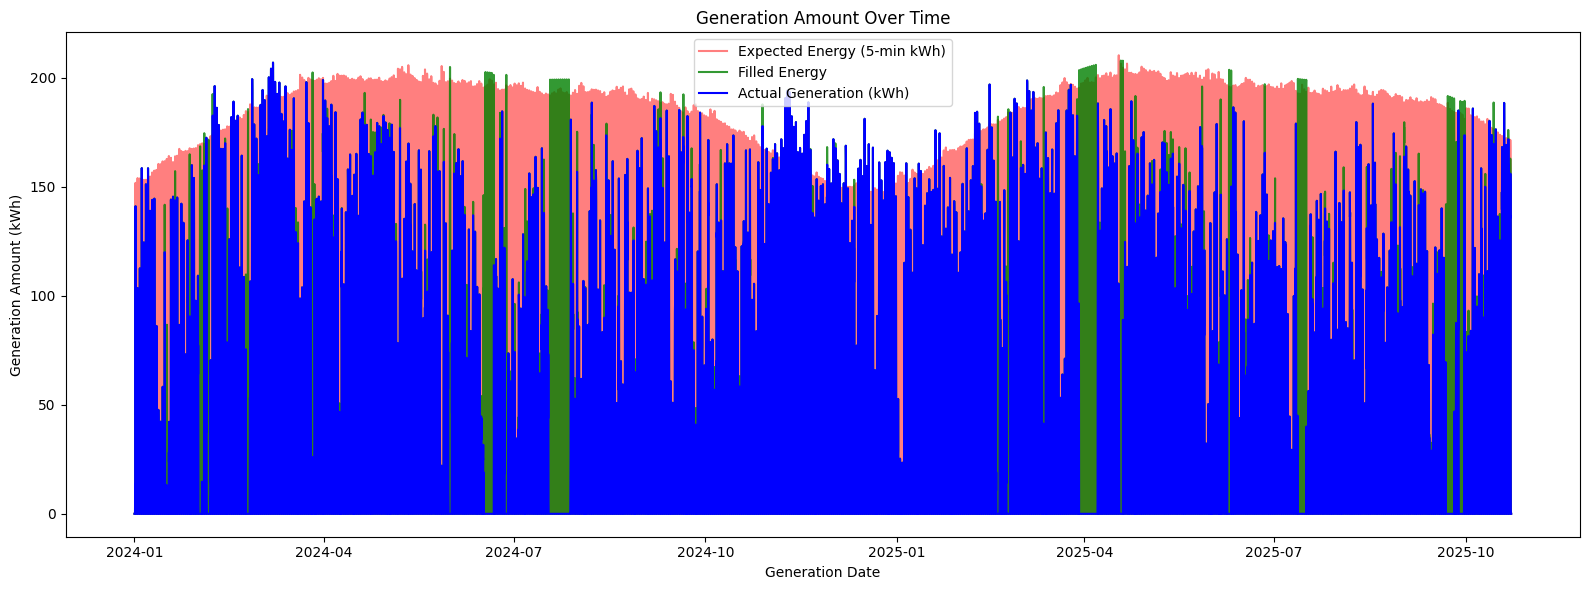

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))
sns.lineplot(data=df, x='generation_date', y='expected_power_temp_corr_kw', label='Expected Energy (5-min kWh)', color='red', alpha=0.5)
sns.lineplot(data=df, x='generation_date', y='filled_energy', label='Filled Energy', color='green', alpha=0.8)
sns.lineplot(data=df, x='generation_date', y='generation_amount_kwh', label='Actual Generation (kWh)', color='blue')
plt.xlabel('Generation Date')
plt.ylabel('Generation Amount (kWh)')
plt.title('Generation Amount Over Time')
plt.legend()
plt.tight_layout()
plt.show()

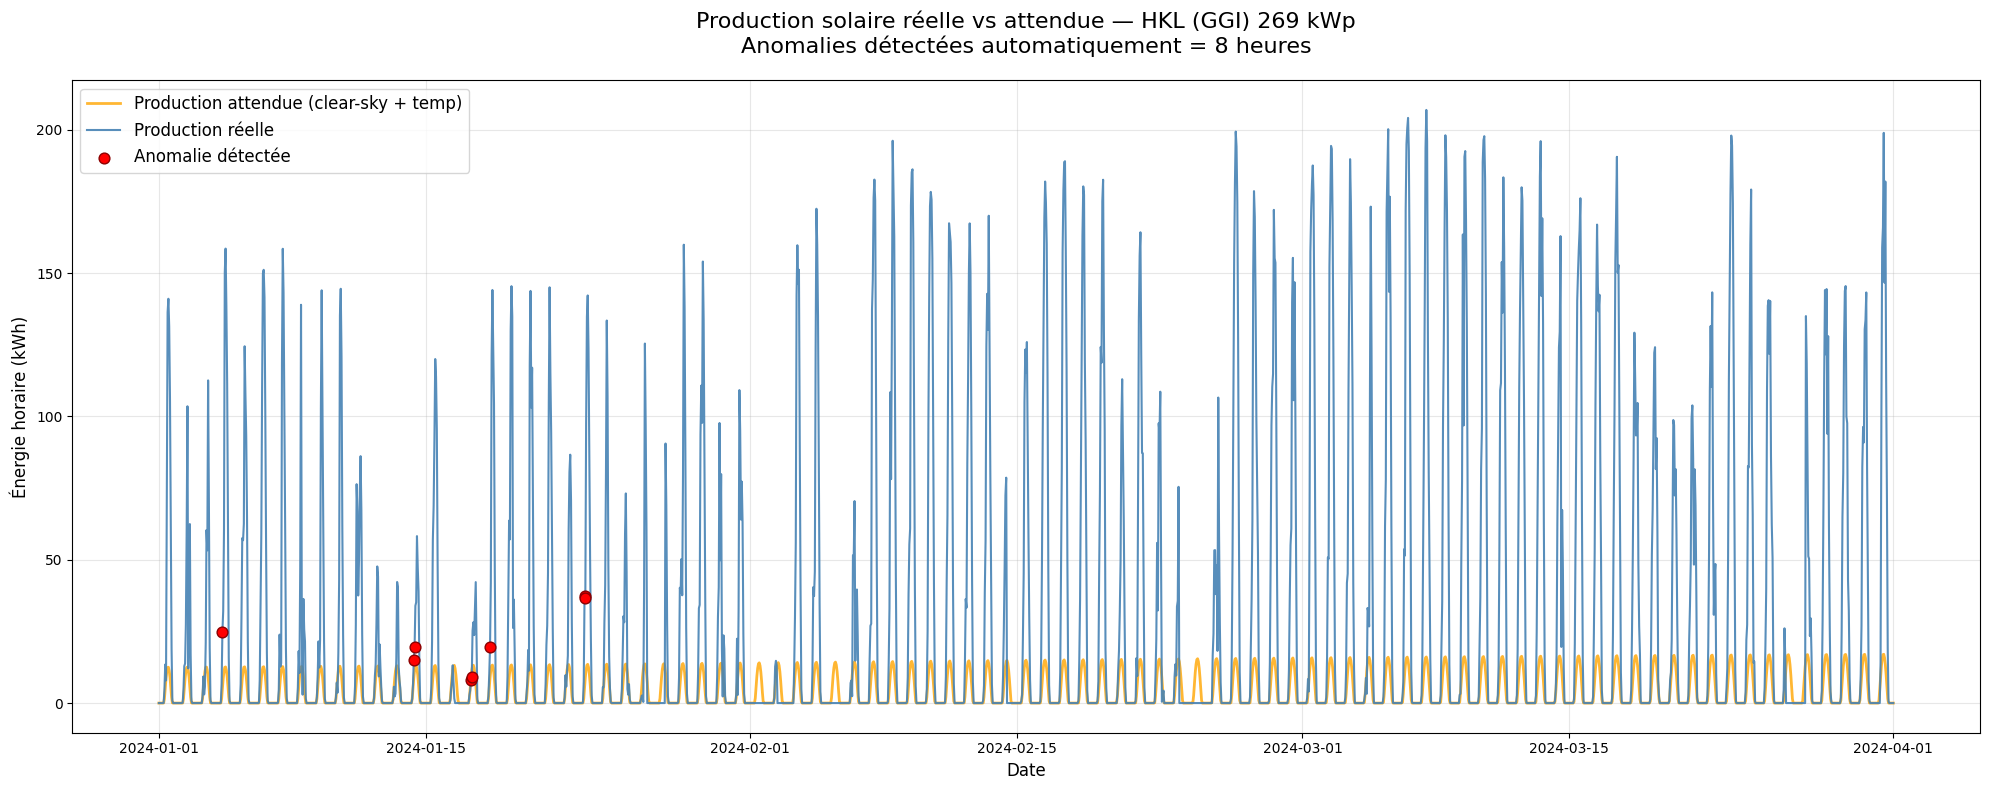

                           real_kwh  expected_kwh  PR_daily
generation_date                                            
2024-01-01 00:00:00+06:00   695.369        79.325     8.766
2024-01-02 00:00:00+06:00   360.900        79.560     4.536
2024-01-03 00:00:00+06:00   357.480        79.813     4.479
2024-01-04 00:00:00+06:00   759.541        80.083     9.484
2024-01-05 00:00:00+06:00   625.970        80.370     7.789
...                             ...           ...       ...
2024-03-28 00:00:00+06:00   937.485       122.307     7.665
2024-03-29 00:00:00+06:00   867.591       122.737     7.069
2024-03-30 00:00:00+06:00   851.552       123.160     6.914
2024-03-31 00:00:00+06:00  1170.321       123.573     9.471
2024-04-01 00:00:00+06:00     0.000         0.000       NaN

[92 rows x 3 columns]


In [25]:
import matplotlib.pyplot as plt
import pandas as pd

# On prend une période intéressante (ex: tout 2024, ou un mois précis)
# Ici exemple : janvier → mars 2024
start = "2024-01-01"
end   = "2024-04-01"
mask = (df['generation_date'] >= start) & (df['generation_date'] <= end)
df_plot = df[mask].copy()

# Resample en horaire pour plus de lisibilité (optionnel mais recommandé)
df_h = df_plot.set_index('generation_date').resample('1H').agg({
    'generation_amount_kwh': 'sum',           # production réelle
    'expected_energy_5min_kwh': 'sum',        # production attendue (clear-sky + PR + temp)
    'is_anomaly': 'max',                      # si au moins 1 point 5-min anormal dans l'heure
    'temp': 'mean',
    'clouds_all': 'mean'
}).rename(columns={
    'generation_amount_kwh': 'real_kwh',
    'expected_energy_5min_kwh': 'expected_kwh'
}).reset_index()

# === LE GRAPHIQUE MAGIQUE ===
plt.figure(figsize=(20, 8))

# 1. Courbe grise : production attendue (clear-sky théorique)
plt.plot(df_h['generation_date'], df_h['expected_kwh'],
         color='orange', linewidth=2, label='Production attendue (clear-sky + temp)', alpha=0.8)

# 2. Courbe bleue : production réelle
plt.plot(df_h['generation_date'], df_h['real_kwh'],
         color='steelblue', linewidth=1.5, label='Production réelle', alpha=0.9)

# 3. Points rouges : heures où une anomalie a été détectée
anomalies = df_h[df_h['is_anomaly']]
plt.scatter(anomalies['generation_date'], anomalies['real_kwh'],
            color='red', s=60, label='Anomalie détectée', zorder=5, edgecolors='darkred', linewidth=1)

# Mise en forme pro
plt.title(f"Production solaire réelle vs attendue — HKL (GGI) 269 kWp\n"
          f"Anomalies détectées automatiquement = {anomalies.shape[0]} heures",
          fontsize=16, pad=20)
plt.ylabel("Énergie horaire (kWh)", fontsize=12)
plt.xlabel("Date", fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Bonus : afficher le PR journalier moyen
df_daily = df_h.resample('D', on='generation_date').sum()
df_daily['PR_daily'] = df_daily['real_kwh'] / df_daily['expected_kwh']
print(df_daily[['real_kwh', 'expected_kwh', 'PR_daily']].round(3))

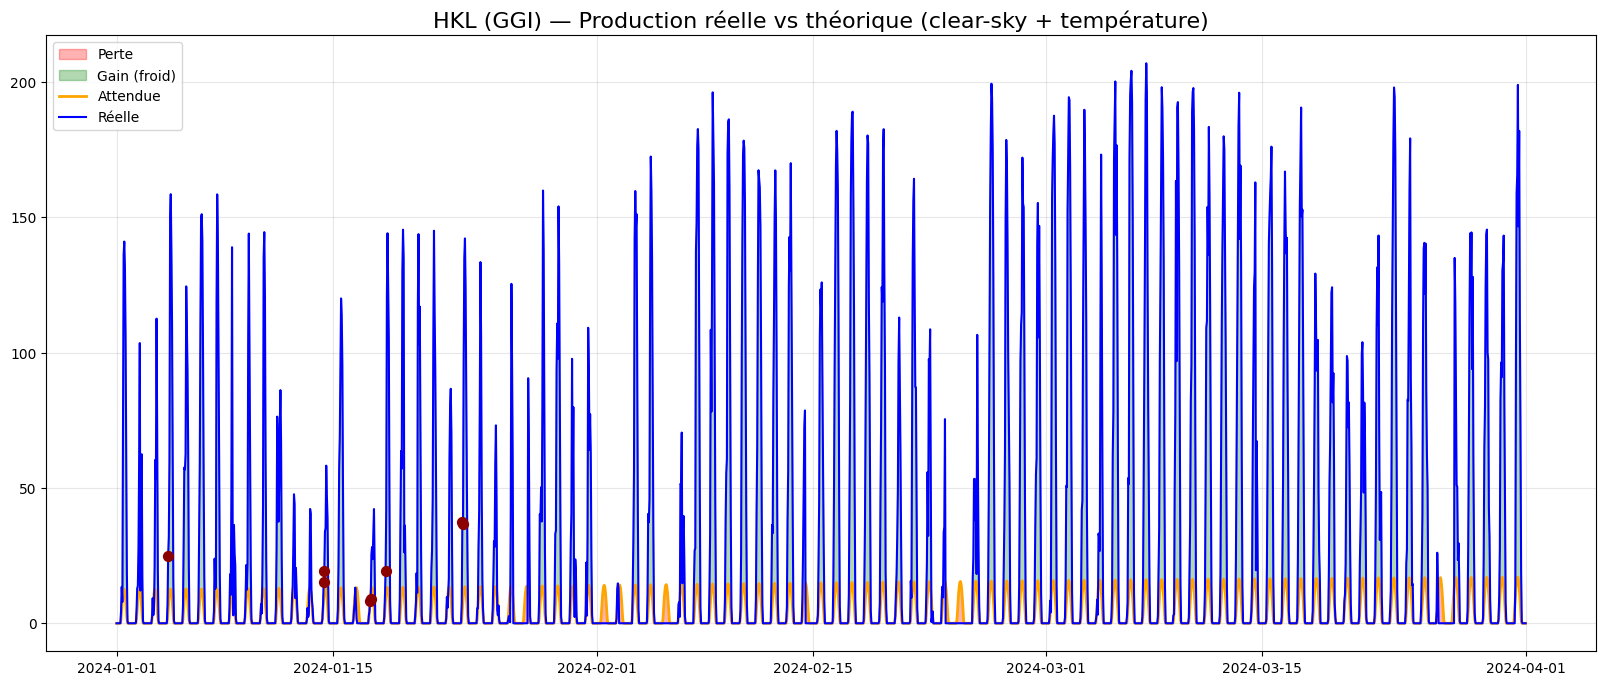

In [26]:
plt.figure(figsize=(20, 8))
plt.fill_between(df_h['generation_date'], df_h['expected_kwh'], df_h['real_kwh'],
                 where=(df_h['real_kwh'] < df_h['expected_kwh']),
                 color='red', alpha=0.3, label='Perte')
plt.fill_between(df_h['generation_date'], df_h['expected_kwh'], df_h['real_kwh'],
                 where=(df_h['real_kwh'] >= df_h['expected_kwh']),
                 color='green', alpha=0.3, label='Gain (froid)')
plt.plot(df_h['generation_date'], df_h['expected_kwh'], color='orange', lw=2, label='Attendue')
plt.plot(df_h['generation_date'], df_h['real_kwh'], color='blue', lw=1.5, label='Réelle')
plt.scatter(anomalies['generation_date'], anomalies['real_kwh'], color='darkred', s=50, zorder=5)

plt.title("HKL (GGI) — Production réelle vs théorique (clear-sky + température)", fontsize=16)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

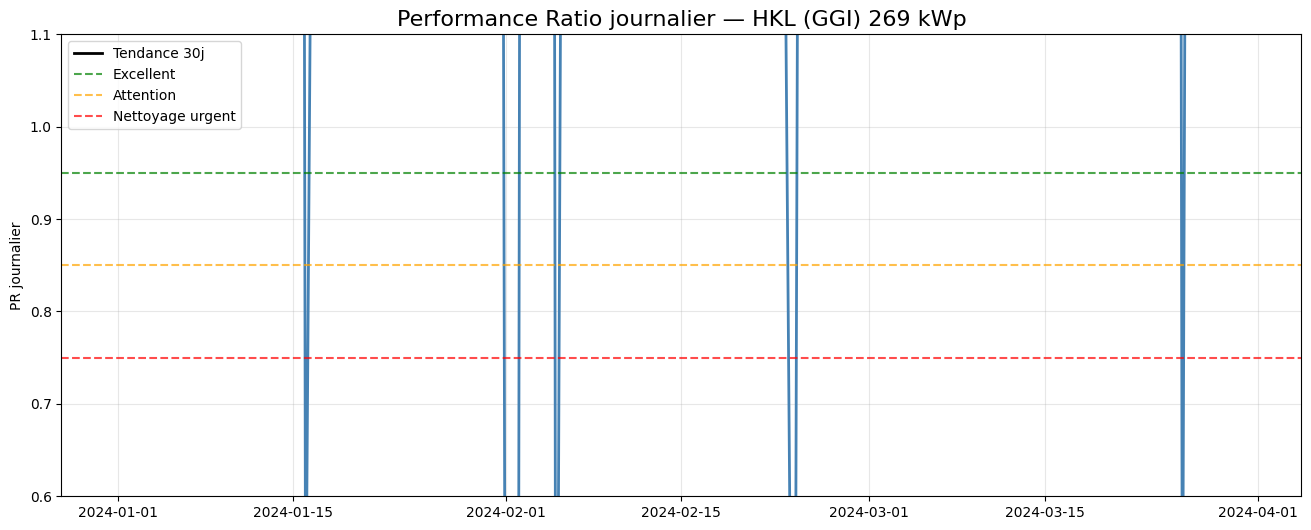

In [27]:
df_daily = df_h.resample('D', on='generation_date').sum()
df_daily['PR_daily'] = df_daily['real_kwh'] / df_daily['expected_kwh']

plt.figure(figsize=(16, 6))
plt.plot(df_daily.index, df_daily['PR_daily'], color='steelblue', linewidth=2)
plt.scatter(df_daily[df_daily['PR_daily'] < 0.85].index,
            df_daily[df_daily['PR_daily'] < 0.85]['PR_daily'],
            color='red', s=60, zorder=5)

# Ligne de tendance sur 30 jours
df_daily['PR_rolling'] = df_daily['PR_daily'].rolling(30, center=True).mean()
plt.plot(df_daily.index, df_daily['PR_rolling'], color='black', linewidth=2, label='Tendance 30j')

plt.title("Performance Ratio journalier — HKL (GGI) 269 kWp", fontsize=16)
plt.ylabel("PR journalier")
plt.axhline(0.95, color='green', linestyle='--', alpha=0.7, label='Excellent')
plt.axhline(0.85, color='orange', linestyle='--', alpha=0.7, label='Attention')
plt.axhline(0.75, color='red', linestyle='--', alpha=0.7, label='Nettoyage urgent')
plt.legend()
plt.grid(alpha=0.3)
plt.ylim(0.6, 1.1)
plt.show()

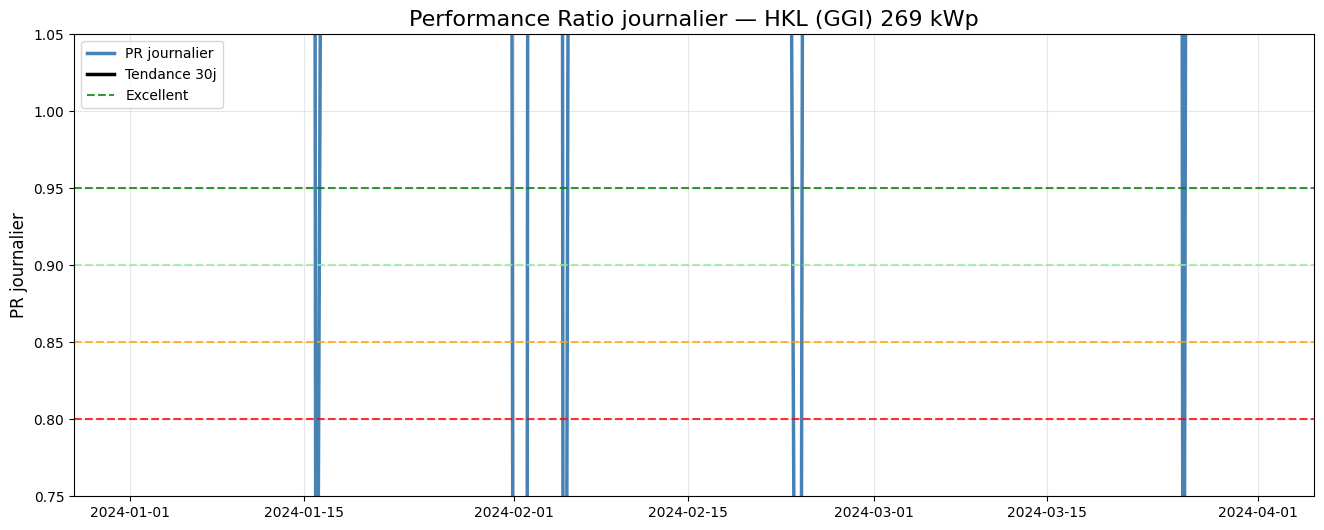

In [28]:
# On remplit juste les trous pour que la courbe soit continue (sans fausser les stats)
pr_for_plot = df_daily['PR_daily'].interpolate(method='linear', limit_direction='both')

plt.figure(figsize=(16, 6))
plt.plot(df_daily.index, pr_for_plot, color='steelblue', linewidth=2.5, label='PR journalier')
plt.plot(df_daily.index, df_daily['PR_rolling'], color='black', linewidth=2.5, label='Tendance 30j')

plt.axhline(0.95, color='green',  linestyle='--', alpha=0.8, label='Excellent')
plt.axhline(0.90, color='lightgreen', linestyle='--', alpha=0.8)
plt.axhline(0.85, color='orange', linestyle='--', alpha=0.8)
plt.axhline(0.80, color='red',    linestyle='--', alpha=0.8)

plt.title("Performance Ratio journalier — HKL (GGI) 269 kWp", fontsize=16)
plt.ylabel("PR journalier", fontsize=12)
plt.ylim(0.75, 1.05)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

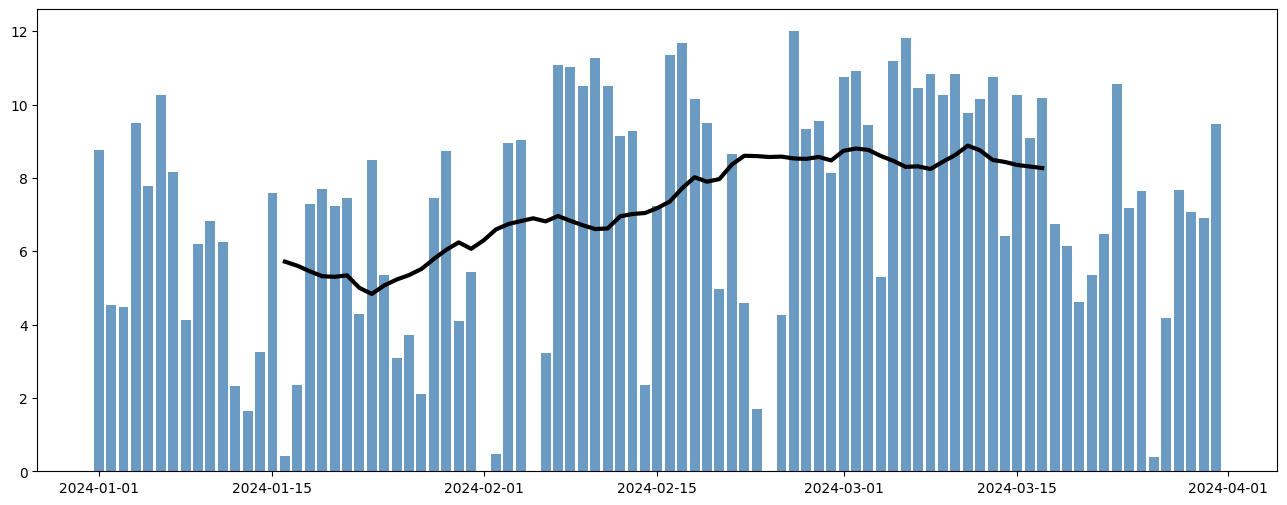

In [29]:
plt.figure(figsize=(16, 6))
plt.bar(df_daily.index, df_daily['PR_daily'], width=0.8, color='steelblue', alpha=0.8, label='PR journalier')
plt.plot(df_daily.index, df_daily['PR_rolling'], color='black', linewidth=3, label='Tendance 30j')
# ... même seuils que plus haut ...

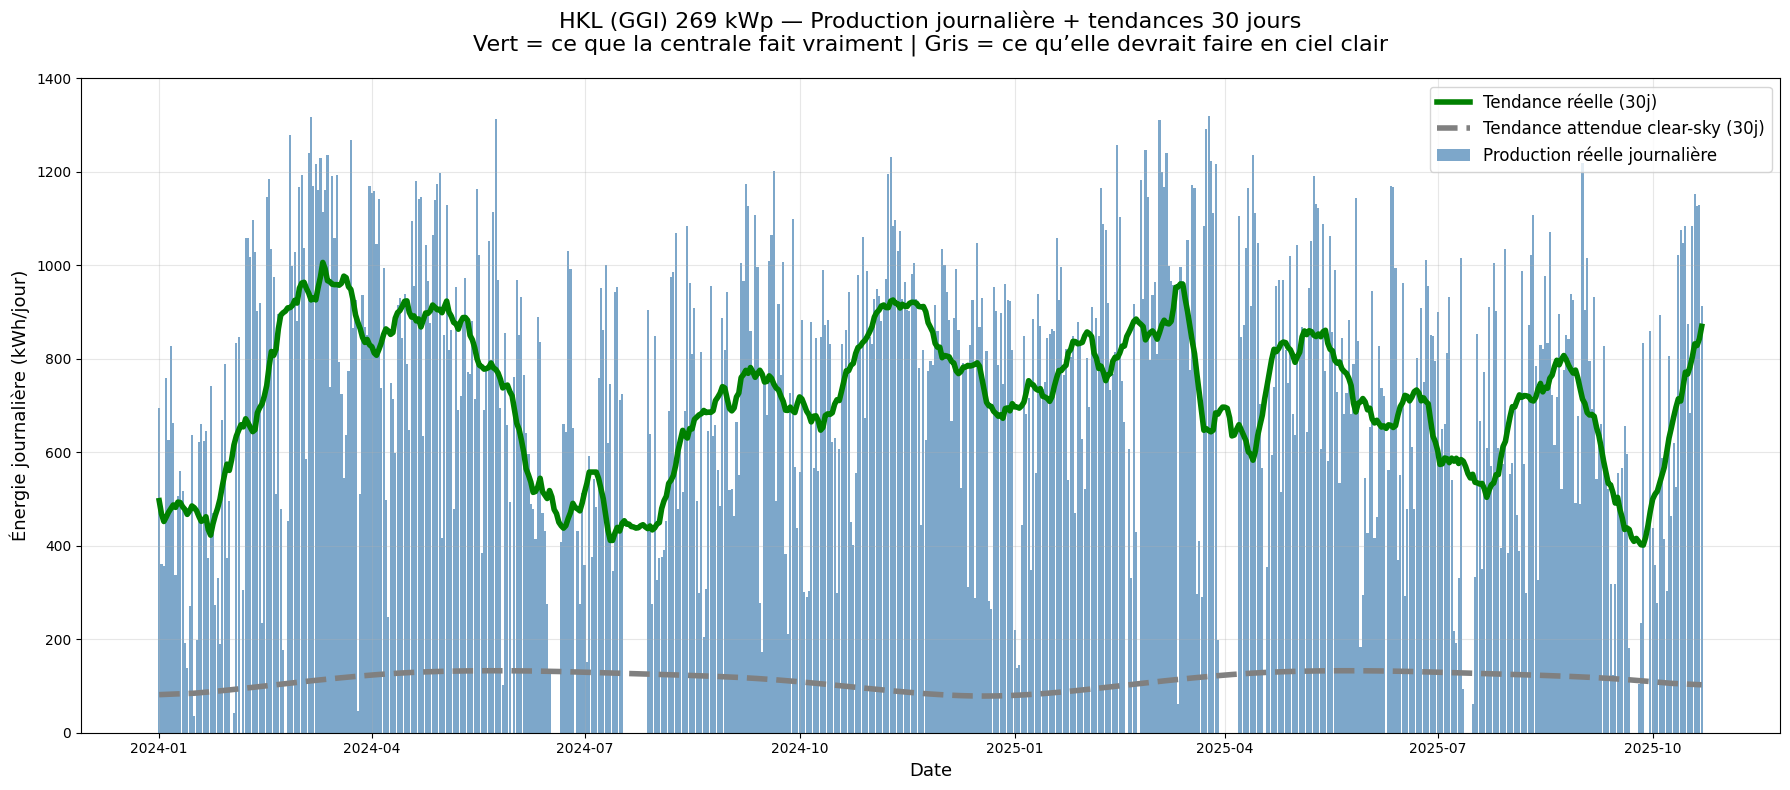

PR moyen sur 30 jours glissants (dernière valeur) : 5.9543


In [30]:
# On repart de ton df résamplé en journalier
df_daily = df.set_index('generation_date').resample('D').agg({
    'generation_amount_kwh': 'sum',        # réel
    'expected_energy_5min_kwh': 'sum'      # attendu clear-sky + temp
}).rename(columns={
    'generation_amount_kwh': 'real_kwh',
    'expected_energy_5min_kwh': 'expected_kwh'
})

# On calcule les moyennes mobiles 30 jours
df_daily['real_30d']     = df_daily['real_kwh'].rolling(30, center=True, min_periods=1).mean()
df_daily['expected_30d'] = df_daily['expected_kwh'].rolling(30, center=True, min_periods=1).mean()

# LE GRAPHIQUE PARFAIT
plt.figure(figsize=(18, 8))

# 1. Barres bleues = production réelle journalière
plt.bar(df_daily.index, df_daily['real_kwh'],
        width=0.9, color='steelblue', alpha=0.7, label='Production réelle journalière')

# 2. Ligne verte = tendance réelle 30 jours
plt.plot(df_daily.index, df_daily['real_30d'],
         color='green', linewidth=4, label='Tendance réelle (30j)')

# 3. Ligne grise = tendance attendue clear-sky 30 jours
plt.plot(df_daily.index, df_daily['expected_30d'],
         color='gray', linewidth=4, linestyle='--', label='Tendance attendue clear-sky (30j)')

# Mise en forme pro
plt.title("HKL (GGI) 269 kWp — Production journalière + tendances 30 jours\n"
          "Vert = ce que la centrale fait vraiment | Gris = ce qu’elle devrait faire en ciel clair",
          fontsize=16, pad=20)
plt.ylabel("Énergie journalière (kWh/jour)", fontsize=13)
plt.xlabel("Date", fontsize=13)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.ylim(0, 1400)
plt.tight_layout()
plt.show()

# Bonus : PR 30 jours lissé (le plus beau chiffre à montrer)
df_daily['PR_30d'] = df_daily['real_kwh'].rolling(30).mean() / df_daily['expected_kwh'].rolling(30).mean()
print("PR moyen sur 30 jours glissants (dernière valeur) :",
      df_daily['PR_30d'].iloc[-1:].round(4).values[0])

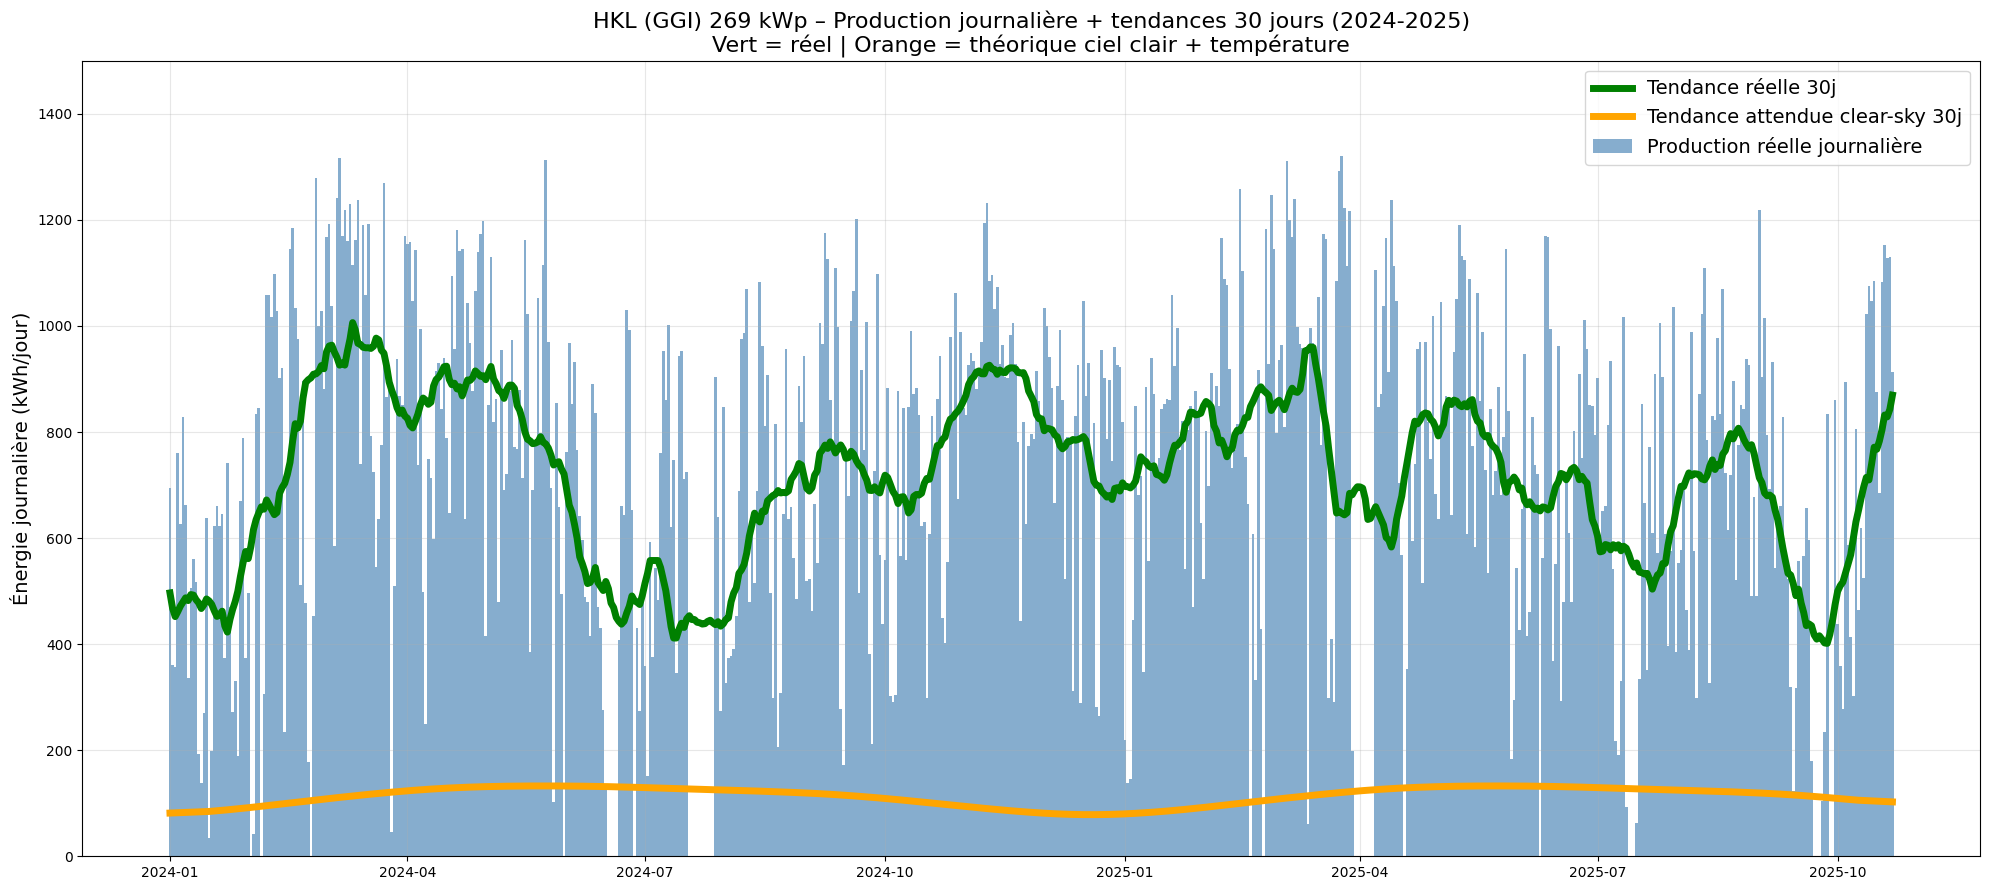

PR moyen sur 30 jours glissants (dernière valeur) : 8.4778


In [31]:
# Recalcul propre du journalier
df_daily = df.set_index('generation_date').resample('D').agg({
    'generation_amount_kwh': 'sum',
    'expected_energy_5min_kwh': 'sum'          # ← cette fois c'est bon
}).rename(columns={
    'generation_amount_kwh': 'real_kwh',
    'expected_energy_5min_kwh': 'expected_kwh'
}).reset_index()

# Moyennes mobiles 30 jours
df_daily['real_30d']     = df_daily['real_kwh'].rolling(30, center=True, min_periods=1).mean()
df_daily['expected_30d'] = df_daily['expected_kwh'].rolling(30, center=True, min_periods=1).mean()

# GRAPHIQUE CORRIGÉ
plt.figure(figsize=(20, 9))
plt.bar(df_daily['generation_date'], df_daily['real_kwh'],
        color='steelblue', alpha=0.65, width=1, label='Production réelle journalière')
plt.plot(df_daily['generation_date'], df_daily['real_30d'],
         color='green', linewidth=5, label='Tendance réelle 30j')
plt.plot(df_daily['generation_date'], df_daily['expected_30d'],
         color='orange', linewidth=5, linestyle='-', label='Tendance attendue clear-sky 30j')

plt.title("HKL (GGI) 269 kWp – Production journalière + tendances 30 jours (2024-2025)\n"
          "Vert = réel | Orange = théorique ciel clair + température", fontsize=16)
plt.ylabel("Énergie journalière (kWh/jour)", fontsize=14)
plt.legend(fontsize=14)
plt.grid(alpha=0.3)
plt.ylim(0, 1500)
plt.tight_layout()
plt.show()

# PR 30 jours (le chiffre magique)
df_daily['PR_30d'] = df_daily['real_30d'] / df_daily['expected_30d']
print("PR moyen sur 30 jours glissants (dernière valeur) :", df_daily['PR_30d'].iloc[-1].round(4))

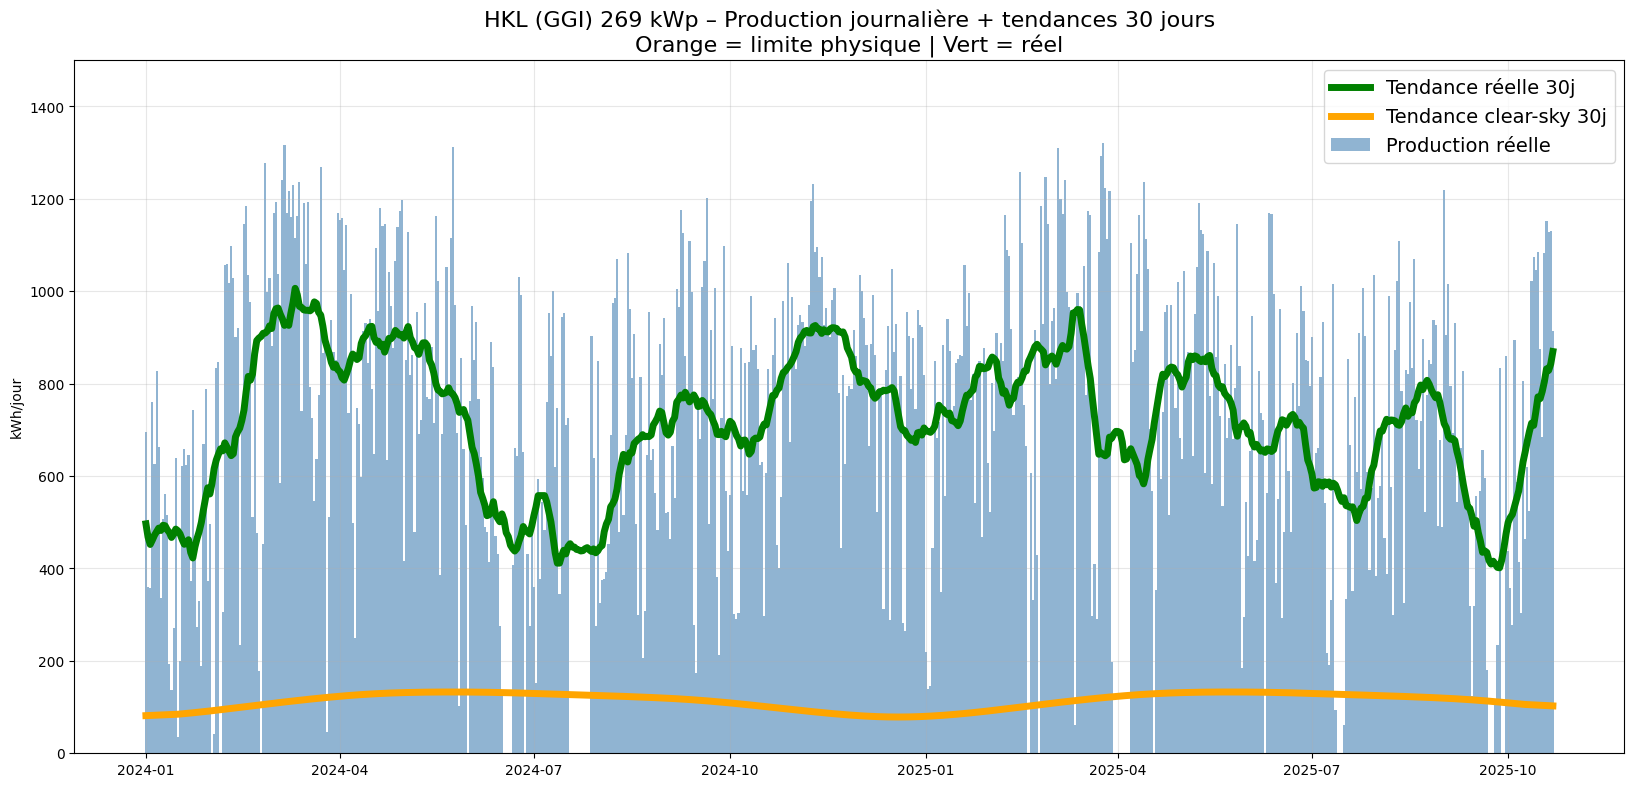

Production attendue moyenne (clear-sky) : 113.0 kWh/jour
Production réelle moyenne : 716.0 kWh/jour
PR moyen sur toute la période : 6.3232


In [32]:
# Recalcul propre – attention aux noms de colonnes !
df_daily = df.set_index('generation_date').resample('D').agg({
    'generation_amount_kwh': 'sum',                    # réel
    'expected_energy_5min_kwh': 'sum'                  # ← ATTENDU CORRECT (déjà × 269.28 × 0.82)
}).rename(columns={
    'generation_amount_kwh': 'real_kwh',
    'expected_energy_5min_kwh': 'expected_kwh'         # ← c’est ça qui était faux avant
})

# Si tu n’as plus la colonne expected_energy_5min_kwh, recalcule-la proprement :
# df['expected_energy_5min_kwh'] = (df['ghi'] / 1000) * 269.28 * 0.82 * (5/60)

df_daily['real_30d']     = df_daily['real_kwh'].rolling(30, center=True, min_periods=1).mean()
df_daily['expected_30d'] = df_daily['expected_kwh'].rolling(30, center=True, min_periods=1).mean()

# GRAPHIQUE CORRIGÉ – cette fois c’est bon
plt.figure(figsize=(20, 9))
plt.bar(df_daily.index, df_daily['real_kwh'], color='steelblue', alpha=0.6, width=1, label='Production réelle')
plt.plot(df_daily.index, df_daily['real_30d'], color='green', linewidth=5, label='Tendance réelle 30j')
plt.plot(df_daily.index, df_daily['expected_30d'], color='orange', linewidth=5, label='Tendance clear-sky 30j')

plt.title("HKL (GGI) 269 kWp – Production journalière + tendances 30 jours\n"
          "Orange = limite physique | Vert = réel", fontsize=16)
plt.ylabel("kWh/jour")
plt.legend(fontsize=14)
plt.ylim(0, 1500)
plt.grid(alpha=0.3)
plt.show()

# Vérification finale
print("Production attendue moyenne (clear-sky) :", df_daily['expected_kwh'].mean().round(0), "kWh/jour")
print("Production réelle moyenne :", df_daily['real_kwh'].mean().round(0), "kWh/jour")
print("PR moyen sur toute la période :", (df_daily['real_kwh'].sum() / df_daily['expected_kwh'].sum()).round(4))

In [33]:
###########################################################################################################

In [34]:
# Target: next 7 days hourly energy
df_h = df.set_index('generation_date').resample('1H').agg({
    'generation_amount_kwh': 'sum',
    'expected_energy_5min_kwh': 'sum',
    'temp': 'mean',
    'clouds_all': 'mean',
    'ghi': 'mean',
    'elevation': 'mean'
}).rename(columns={'generation_amount_kwh': 'energy_kwh'})

df_h['energy_kwh_expected'] = df_h['expected_energy_5min_kwh']

# Lagged features (very powerful)
for lag in [1, 2, 3, 24, 48, 168]:  # 1h, 2h, 3h, yesterday, 2 days ago, 1 week ago
    df_h[f'energy_lag_{lag}h'] = df_h['energy_kwh'].shift(lag)
    df_h[f'clouds_lag_{lag}h'] = df_h['clouds_all'].shift(lag)

# Rolling performance
df_h['PR_24h'] = df_h['energy_kwh'].rolling(24).sum() / df_h['energy_kwh_expected'].rolling(24).sum()

# Final features
features = [col for col in df_h.columns if col.startswith(('energy_lag', 'clouds_lag', 'PR_24h', 'temp', 'ghi', 'clouds_all', 'hour', 'dayofyear'))]

In [35]:
import lightgbm as lgb
from sklearn.model_selection import TimeSeriesSplit

X = df_h[features].fillna(method='bfill')
y = df_h['energy_kwh']

tscv = TimeSeriesSplit(n_splits=5)
model = lgb.LGBMRegressor(n_estimators=1000, learning_rate=0.05, max_depth=8)

for train_idx, val_idx in tscv.split(X):
    model.fit(X.iloc[train_idx], y.iloc[train_idx],
              eval_set=[(X.iloc[val_idx], y.iloc[val_idx])],
              early_stopping_rounds=50, verbose=False)

ModuleNotFoundError: No module named 'lightgbm'